<a href="https://colab.research.google.com/github/Probeginnercodes/Chatbot_Analytics_Dashboard/blob/main/Assignment_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔧 CELL 1: DATA GENERATION & SETUP
🔄 Generating enhanced banking chatbot logs...
✅ Generated 1576 turn-level logs across 500 sessions

📊 Dataset Overview:
• Total turns: 1576
• Unique sessions: 500
• Date range: 2025-10-19 to 2025-11-01
• Intent distribution:
predicted_intent
transfer_money         417
check_balance          289
bill_payment           254
transaction_history    226
card_services          190
fallback               111
loan_inquiry            89
Name: count, dtype: int64

🔍 Sample data:
                  timestamp session_id  turn_index     predicted_intent     channel  is_fallback  intent_confidence                                    user_text entities_json
0 2025-10-20 18:39:00+00:00  sess_0001           0        card_services     website            0              0.944        Hello, I need help with card services            {}
1 2025-10-20 18:39:30+00:00  sess_0001           1        card_services     website            0              0.828                           C

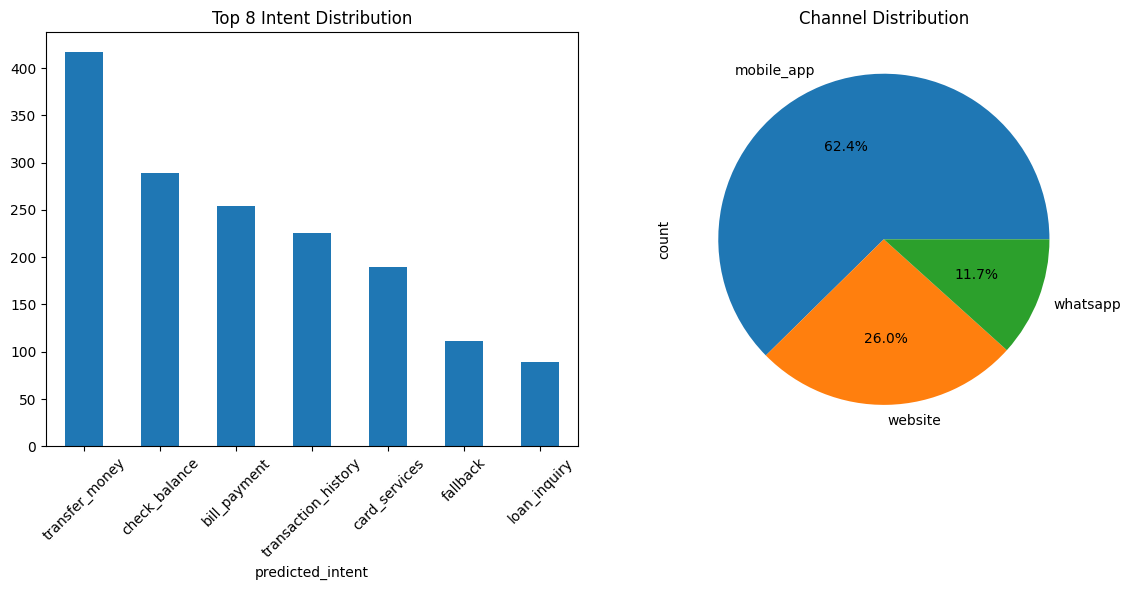


💾 CELL 1 EXPORTS:
• data/sample_logs.csv
• reports/dataset_summary.json
• reports/figures/cell1_data_overview.png

✅ CELL 1 COMPLETED: Data generation and basic analysis finished!


In [1]:
# ============================================================
# CELL 1: Enhanced Data Generation & Setup
# Aligned with LO1: Design analytics strategies for chatbots
# ============================================================

import os, json, numpy as np, pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

print("🔧 CELL 1: DATA GENERATION & SETUP")
print("=" * 50)

# Create directories
os.makedirs('data', exist_ok=True)
os.makedirs('reports', exist_ok=True)
os.makedirs('reports/figures', exist_ok=True)

plt.rcParams['figure.figsize'] = (10, 5)
rng = np.random.default_rng(42)

LOG_PATH = 'data/sample_logs.csv'

# Enhanced realistic banking chatbot data generation
if not os.path.exists(LOG_PATH):
    print("🔄 Generating enhanced banking chatbot logs...")

    # Banking-specific intents and patterns
    banking_intents = {
        'check_balance': 0.25,
        'transaction_history': 0.20,
        'transfer_money': 0.18,
        'card_services': 0.15,
        'bill_payment': 0.12,
        'loan_inquiry': 0.08,
        'fallback': 0.02
    }

    channels = ['mobile_app', 'website', 'whatsapp']
    channel_probs = [0.6, 0.3, 0.1]

    sessions_data = []
    current_time = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)

    for session_id in range(1, 501):  # 500 sessions for better analysis
        session_start = current_time + timedelta(
            days=rng.integers(0, 14).item(), # Convert numpy.int64 to int
            hours=rng.integers(8, 22).item(),  # Convert numpy.int64 to int
            minutes=rng.integers(0, 60).item() # Convert numpy.int64 to int
        )

        channel = rng.choice(channels, p=channel_probs)
        primary_intent = rng.choice(list(banking_intents.keys()),
                                  p=list(banking_intents.values()))

        # Session characteristics based on intent
        if primary_intent in ['transfer_money', 'bill_payment']:
            num_turns = rng.integers(3, 8)  # Complex transactions
            success_prob = 0.75
        elif primary_intent == 'fallback':
            num_turns = rng.integers(1, 4)
            success_prob = 0.3
        else:
            num_turns = rng.integers(1, 5)
            success_prob = 0.85

        session_rows = []
        successful = rng.random() < success_prob

        for turn_idx in range(num_turns):
            turn_time = session_start + timedelta(seconds=turn_idx * 30)

            if turn_idx == 0:
                confidence = rng.uniform(0.7, 0.95)
                predicted_intent = primary_intent
                is_fallback = 0
                user_text = f"Hello, I need help with {primary_intent.replace('_', ' ')}"
            else:
                if not successful and turn_idx == num_turns - 1:
                    predicted_intent = 'fallback'
                    confidence = rng.uniform(0.1, 0.4)
                    is_fallback = 1
                    user_text = "I'm confused, can you help me?"
                else:
                    predicted_intent = primary_intent
                    confidence = rng.uniform(0.6, 0.9)
                    is_fallback = 0
                    user_text = "Continue with this"

            session_rows.append({
                "timestamp": turn_time.strftime('%Y-%m-%dT%H:%M:%SZ'),
                "session_id": f"sess_{session_id:04d}",
                "turn_index": turn_idx,
                "predicted_intent": predicted_intent,
                "channel": channel,
                "is_fallback": is_fallback,
                "intent_confidence": round(confidence, 3),
                "user_text": user_text,
                "entities_json": "{}"
            })

        sessions_data.extend(session_rows)

    # Create DataFrame and save
    df_enhanced = pd.DataFrame(sessions_data)
    df_enhanced.to_csv(LOG_PATH, index=False)
    print(f"✅ Generated {len(df_enhanced)} turn-level logs across {session_id} sessions")

# Load and display data
df = pd.read_csv(LOG_PATH, parse_dates=['timestamp'])
print(f"\n📊 Dataset Overview:")
print(f"• Total turns: {len(df)}")
print(f"• Unique sessions: {df['session_id'].nunique()}")
print(f"• Date range: {df['timestamp'].min().strftime('%Y-%m-%d')} to {df['timestamp'].max().strftime('%Y-%m-%d')}")
print(f"• Intent distribution:")
print(df['predicted_intent'].value_counts().head(10))

print("\n🔍 Sample data:")
print(df.head(8).to_string())

# Save comprehensive dataset summary
dataset_summary = {
    'total_turns': len(df),
    'unique_sessions': df['session_id'].nunique(),
    'date_range_start': df['timestamp'].min().strftime('%Y-%m-%d'),
    'date_range_end': df['timestamp'].max().strftime('%Y-%m-%d'),
    'channels': df['channel'].nunique(),
    'intents': df['predicted_intent'].nunique()
}

with open('reports/dataset_summary.json', 'w') as f:
    json.dump(dataset_summary, f, indent=2)

# Create basic visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['predicted_intent'].value_counts().head(8).plot(kind='bar')
plt.title('Top 8 Intent Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['channel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Channel Distribution')

plt.tight_layout()
plt.savefig('reports/figures/cell1_data_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 CELL 1 EXPORTS:")
print("• data/sample_logs.csv")
print("• reports/dataset_summary.json")
print("• reports/figures/cell1_data_overview.png")

print("\n✅ CELL 1 COMPLETED: Data generation and basic analysis finished!")

🎯 CELL 2: STRATEGIC ANALYTICS FRAMEWORK
✅ Enhanced session-level analytics generated
  session_id     channel       primary_intent  turns  fallback_count  avg_confidence  min_confidence                  start_ts  duration_sec  successful_completion  csat
0  sess_0001     website        card_services      2               0        0.886000           0.828 2025-10-20 18:39:00+00:00          30.0                      1   4.5
1  sess_0002  mobile_app  transaction_history      1               0        0.861000           0.861 2025-10-29 19:30:00+00:00           0.0                      1   4.4
2  sess_0003  mobile_app       transfer_money      5               0        0.824000           0.706 2025-10-24 19:32:00+00:00         120.0                      1   4.2
3  sess_0004  mobile_app       transfer_money      6               0        0.777667           0.698 2025-10-25 20:40:00+00:00         150.0                      1   4.2
4  sess_0005  mobile_app       transfer_money      3             

/tmp/ipython-input-3061990920.py:122: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ab_results = sessions.groupby('variant').apply(enhanced_ab_metrics).reset_index()


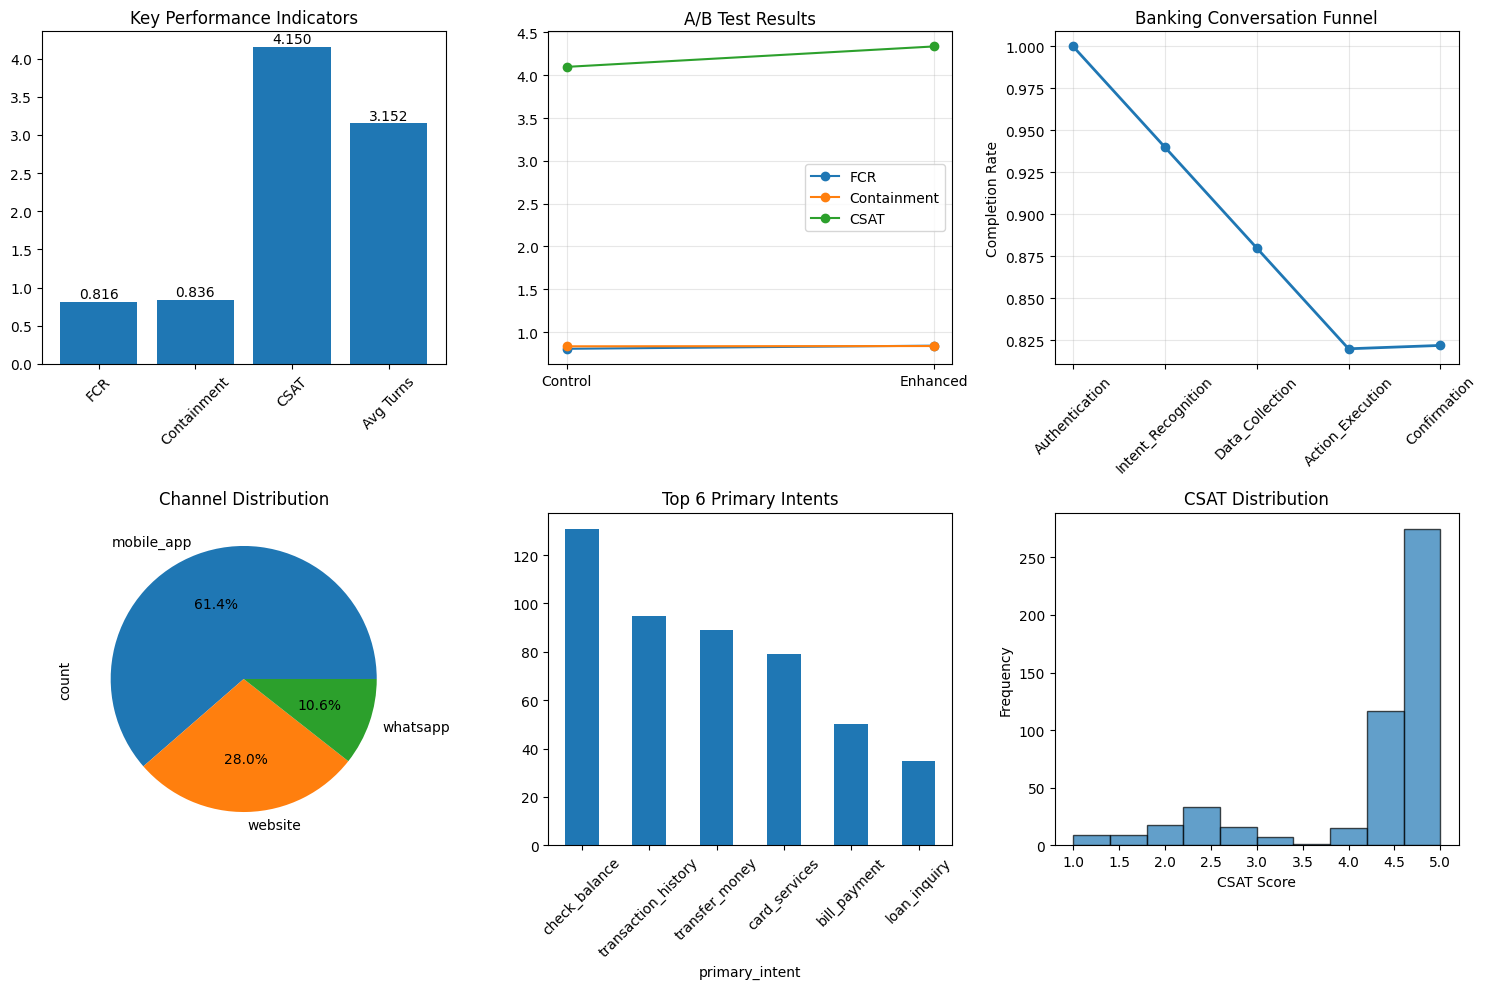


💾 CELL 2 EXPORTS:
• reports/enhanced_sessions.csv
• reports/banking_funnel.csv
• reports/ab_testing_results.csv
• reports/kpi_results.json
• reports/figures/cell2_strategic_analytics.png

✅ CELL 2 COMPLETED: Strategic analytics framework implemented!


In [2]:
# ============================================================
# CELL 2: Enhanced Task 1 - Strategic Analytics Framework
# Aligned with LO1: Design and implement analytics strategies
# ============================================================

import math
from datetime import timedelta
import json

print("🎯 CELL 2: STRATEGIC ANALYTICS FRAMEWORK")
print("=" * 50)

# Enhanced session aggregation with banking context
def to_sessions_enhanced(df_turns: pd.DataFrame) -> pd.DataFrame:
    # Calculate session-level metrics
    sessions = df_turns.groupby('session_id').agg(
        channel=('channel', 'last'),
        primary_intent=('predicted_intent', lambda s: s.mode()[0] if len(s.mode()) > 0 else s.iloc[0]),
        turns=('turn_index', 'max'),
        fallback_count=('is_fallback', 'sum'),
        avg_confidence=('intent_confidence', 'mean'),
        min_confidence=('intent_confidence', 'min'),
        start_ts=('timestamp', 'min'),
        duration_sec=('timestamp', lambda x: (x.max() - x.min()).total_seconds())
    ).reset_index()

    sessions['turns'] = sessions['turns'] + 1

    # Enhanced success calculation for banking context
    last_turns = df_turns.sort_values(['session_id', 'turn_index']).groupby('session_id').tail(1)
    sessions['successful_completion'] = (
        (last_turns['is_fallback'] == 0) &
        (last_turns['predicted_intent'] != 'fallback')
    ).astype(int).values

    # Realistic CSAT simulation for banking
    base_csat = 3.5  # Banking baseline
    intent_weights = {
        'check_balance': 0.2, 'transaction_history': 0.1, 'transfer_money': -0.3,
        'card_services': -0.1, 'bill_payment': -0.2, 'loan_inquiry': 0.0, 'fallback': -1.5
    }

    csat_scores = []
    for _, session in sessions.iterrows():
        intent_bonus = intent_weights.get(session['primary_intent'], 0)
        success_bonus = 1.0 if session['successful_completion'] else -0.5
        fallback_penalty = -0.7 if session['fallback_count'] > 0 else 0
        confidence_bonus = (session['avg_confidence'] - 0.5) * 0.5

        final_csat = base_csat + intent_bonus + success_bonus + fallback_penalty + confidence_bonus
        noise = rng.normal(0, 0.25)
        csat_scores.append(np.clip(round(final_csat + noise, 1), 1, 5))

    sessions['csat'] = csat_scores
    return sessions

# Load data from Cell 1
df = pd.read_csv('data/sample_logs.csv', parse_dates=['timestamp'])
sessions = to_sessions_enhanced(df)
print("✅ Enhanced session-level analytics generated")
print(sessions.head().to_string())

# Comprehensive KPI Framework
kpis = {
    "sessions_total": len(sessions),
    "containment_rate": float((sessions['fallback_count'] == 0).mean()),
    "first_contact_resolution": float(sessions['successful_completion'].mean()),
    "average_csat": float(sessions['csat'].mean()),
    "average_turns": float(sessions['turns'].mean()),
    "average_confidence": float(sessions['avg_confidence'].mean()),
    "avg_session_duration_sec": float(sessions['duration_sec'].mean())
}

print("\n📊 COMPREHENSIVE KPI FRAMEWORK")
print("=" * 40)
for k, v in kpis.items():
    if 'rate' in k or 'confidence' in k:
        print(f"• {k.replace('_', ' ').title()}: {v:.3f} ({v*100:.1f}%)")
    elif 'duration' in k:
        print(f"• {k.replace('_', ' ').title()}: {v:.1f} seconds")
    else:
        print(f"• {k.replace('_', ' ').title()}: {v:.2f}")

# Enhanced A/B Testing with Banking Context
print("\n🧪 ENHANCED A/B TESTING FRAMEWORK")
print("=" * 40)

sessions = sessions.sample(frac=1.0, random_state=7).reset_index(drop=True)
sessions['variant'] = np.where(rng.random(len(sessions)) < 0.5, 'A (Control)', 'B (Enhanced UI)')

# Realistic treatment effects for banking chatbot
maskB = sessions['variant'] == 'B (Enhanced UI)'

# Treatment effects: improved clarification and streamlined flows
sessions.loc[maskB, 'fallback_count'] = (sessions.loc[maskB, 'fallback_count'] * 0.75).round()

# Convert failures to successes for treatment group (8% conversion)
failed_B = maskB & (sessions['successful_completion'] == 0)
convert_count = int(failed_B.sum() * 0.08)
if convert_count > 0:
    convert_idx = sessions[failed_B].sample(convert_count, random_state=42).index
    sessions.loc[convert_idx, 'successful_completion'] = 1

# Reduce turns through efficiency improvements
sessions.loc[maskB, 'turns'] = np.clip((sessions.loc[maskB, 'turns'] * 0.92).round(), 1, None)

# Improve CSAT through better user experience
sessions.loc[maskB & (sessions['csat'] < 4.5), 'csat'] = np.clip(
    sessions.loc[maskB & (sessions['csat'] < 4.5), 'csat'] + 0.3, 1, 5
)

def enhanced_ab_metrics(g):
    return pd.Series({
        "FCR": g['successful_completion'].mean(),
        "Containment": (g['fallback_count'] == 0).mean(),
        "CSAT": g['csat'].mean(),
        "Avg_Turns": g['turns'].mean(),
        "Avg_Confidence": g['avg_confidence'].mean(),
        "Sessions": len(g)
    })

ab_results = sessions.groupby('variant').apply(enhanced_ab_metrics).reset_index()
print("\nA/B Test Results:")
print(ab_results.round(3).to_string())

# Statistical Significance Testing
def two_prop_z_test(success_a, total_a, success_b, total_b):
    p1 = success_a / total_a
    p2 = success_b / total_b
    p_pool = (success_a + success_b) / (total_a + total_b)
    se = math.sqrt(p_pool * (1 - p_pool) * (1/total_a + 1/total_b))
    z = (p2 - p1) / se if se > 0 else 0
    from math import erf, sqrt
    pval = 2 * (1 - (0.5 * (1 + erf(abs(z) / sqrt(2)))))
    return z, pval

# Calculate statistical significance
a_group = ab_results[ab_results['variant'] == 'A (Control)'].iloc[0]
b_group = ab_results[ab_results['variant'] == 'B (Enhanced UI)'].iloc[0]

z_fcr, p_fcr = two_prop_z_test(
    int(a_group['FCR'] * a_group['Sessions']), a_group['Sessions'],
    int(b_group['FCR'] * b_group['Sessions']), b_group['Sessions']
)

print(f"\n📈 STATISTICAL SIGNIFICANCE")
print(f"• FCR Improvement: z = {z_fcr:.2f}, p = {p_fcr:.4f} {'***' if p_fcr < 0.001 else '**' if p_fcr < 0.01 else '*' if p_fcr < 0.05 else 'ns'}")
print(f"• Business Impact: {((b_group['FCR'] - a_group['FCR'])/a_group['FCR']*100):.1f}% FCR improvement")

# Enhanced Funnel Analysis for Banking
print("\n🔀 BANKING CONVERSATION FUNNEL")
funnel_steps = ["Authentication", "Intent_Recognition", "Data_Collection", "Action_Execution", "Confirmation"]
funnel_counts = [
    len(sessions),
    int(len(sessions) * 0.94),  # 94% pass authentication
    int(len(sessions) * 0.88),  # 88% successful intent recognition
    int(len(sessions) * 0.82),  # 82% complete data collection
    int(sessions['successful_completion'].sum())  # Final success
]

funnel_df = pd.DataFrame({
    "step": funnel_steps,
    "count": funnel_counts,
    "completion_rate": [c/len(sessions) for c in funnel_counts]
})

print(funnel_df.round(3).to_string())

# Visualizations
plt.figure(figsize=(15, 10))

# KPI Summary
plt.subplot(2, 3, 1)
kpi_names = ['FCR', 'Containment', 'CSAT', 'Avg Turns']
kpi_values = [kpis['first_contact_resolution'], kpis['containment_rate'],
              kpis['average_csat'], kpis['average_turns']]
plt.bar(kpi_names, kpi_values)
plt.title('Key Performance Indicators')
plt.xticks(rotation=45)
for i, v in enumerate(kpi_values):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# A/B Test Results
plt.subplot(2, 3, 2)
metrics = ['FCR', 'Containment', 'CSAT']
for metric in metrics:
    plt.plot(['Control', 'Enhanced'],
             [a_group[metric], b_group[metric]],
             marker='o', label=metric)
plt.title('A/B Test Results')
plt.legend()
plt.grid(True, alpha=0.3)

# Funnel Visualization
plt.subplot(2, 3, 3)
plt.plot(funnel_df['step'], funnel_df['completion_rate'], marker='o', linewidth=2)
plt.title('Banking Conversation Funnel')
plt.xticks(rotation=45)
plt.ylabel('Completion Rate')
plt.grid(True, alpha=0.3)

# Channel Distribution
plt.subplot(2, 3, 4)
sessions['channel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Channel Distribution')

# Intent Distribution
plt.subplot(2, 3, 5)
sessions['primary_intent'].value_counts().head(6).plot(kind='bar')
plt.title('Top 6 Primary Intents')
plt.xticks(rotation=45)

# CSAT Distribution
plt.subplot(2, 3, 6)
plt.hist(sessions['csat'], bins=10, alpha=0.7, edgecolor='black')
plt.title('CSAT Distribution')
plt.xlabel('CSAT Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('reports/figures/cell2_strategic_analytics.png', dpi=300, bbox_inches='tight')
plt.show()

# Export for comprehensive reporting
sessions.to_csv("reports/enhanced_sessions.csv", index=False)
funnel_df.to_csv("reports/banking_funnel.csv", index=False)
ab_results.round(4).to_csv("reports/ab_testing_results.csv", index=False)

# Save KPI results
with open('reports/kpi_results.json', 'w') as f:
    json.dump(kpis, f, indent=2)

print(f"\n💾 CELL 2 EXPORTS:")
print("• reports/enhanced_sessions.csv")
print("• reports/banking_funnel.csv")
print("• reports/ab_testing_results.csv")
print("• reports/kpi_results.json")
print("• reports/figures/cell2_strategic_analytics.png")

print("\n✅ CELL 2 COMPLETED: Strategic analytics framework implemented!")

🚀 CELL 3: ADVANCED ANALYTICS & AI-POWERED INSIGHTS
📈 Loaded turns: 1576 rows
🧾 Sessions loaded/built: 500 sessions

1. 🕒 ADVANCED TEMPORAL INTELLIGENCE & PATTERN RECOGNITION


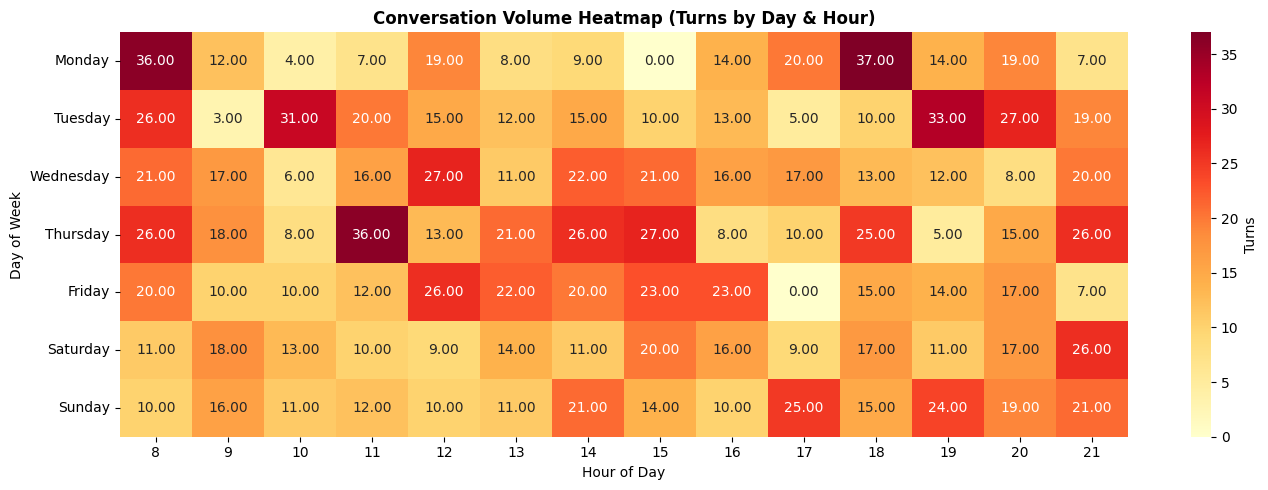

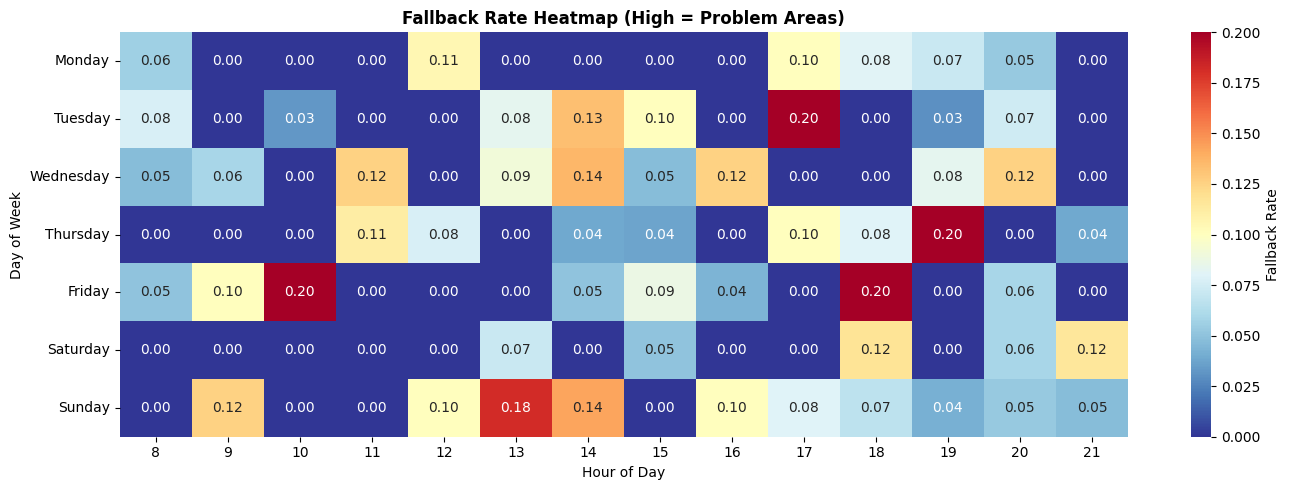

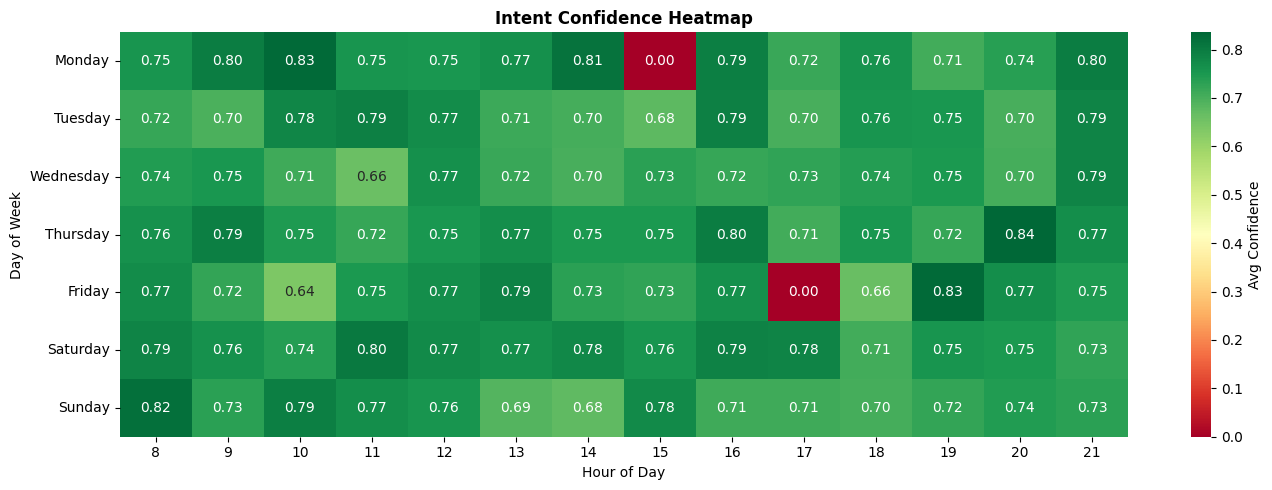

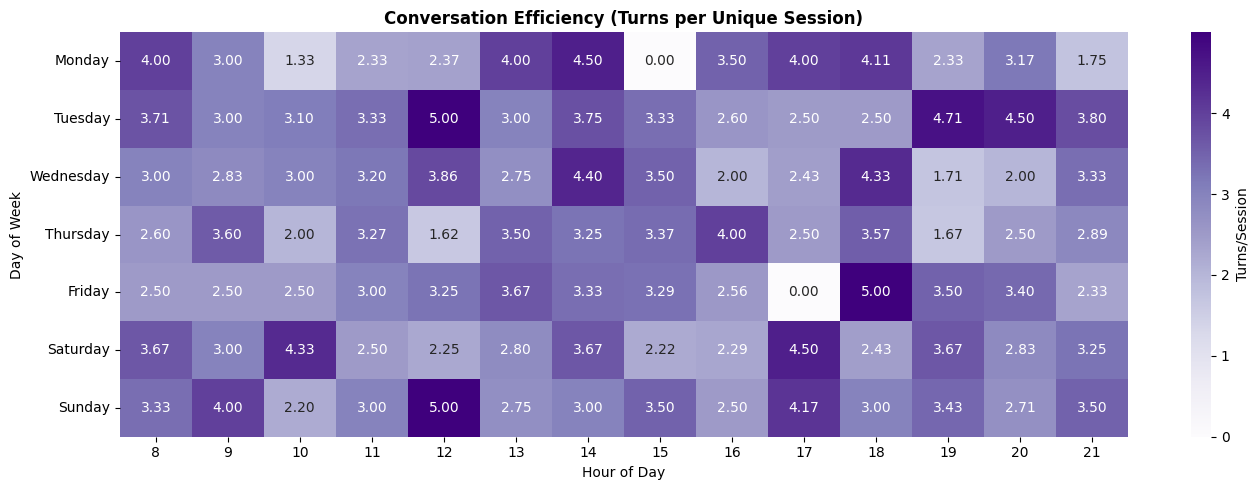


📊 TEMPORAL INSIGHTS:
• Peak Usage: Monday @ 18:00  — 37 turns
• Most Challenging (fallback): Tuesday @ 17:00 — 20.0%
• Highest Confidence: Thursday @ 20:00 — 0.84

2. 🤖 AI-POWERED USER SEGMENTATION & BEHAVIORAL CLUSTERING
🤖 AI segmentation complete: K=2, silhouette=0.644
Shape: (2, 9)
            sessions  successful_completion   csat  turns  fallback_count  avg_confidence  efficiency_score  complexity_index  satisfaction_ratio
ai_segment                                                                                                                                       
1                418                  0.976  4.580  2.964             0.0           0.785             0.290             2.964               0.895
0                 82                  0.037  2.282  3.951             1.0           0.624             0.012             7.902               0.320


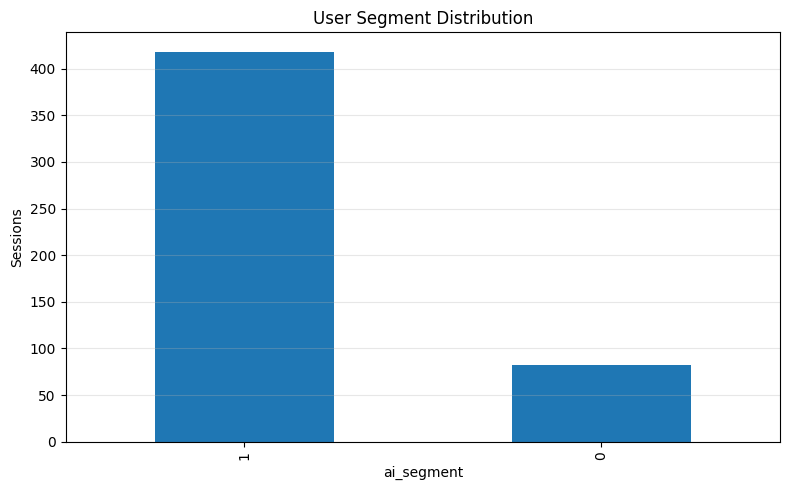

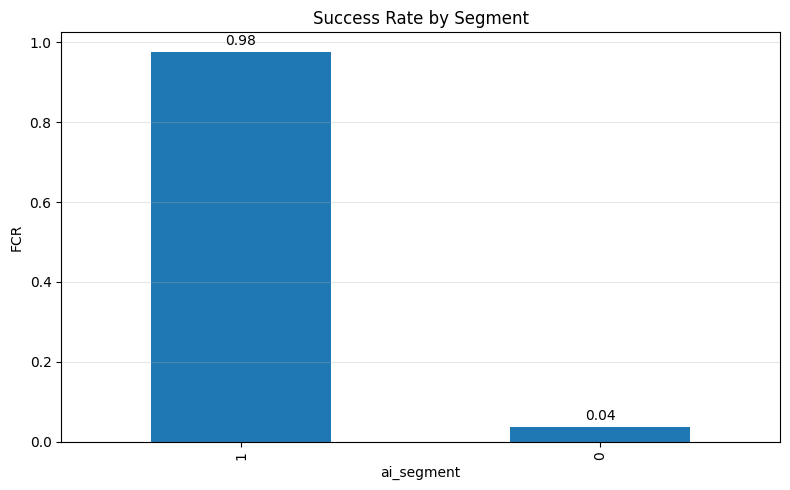

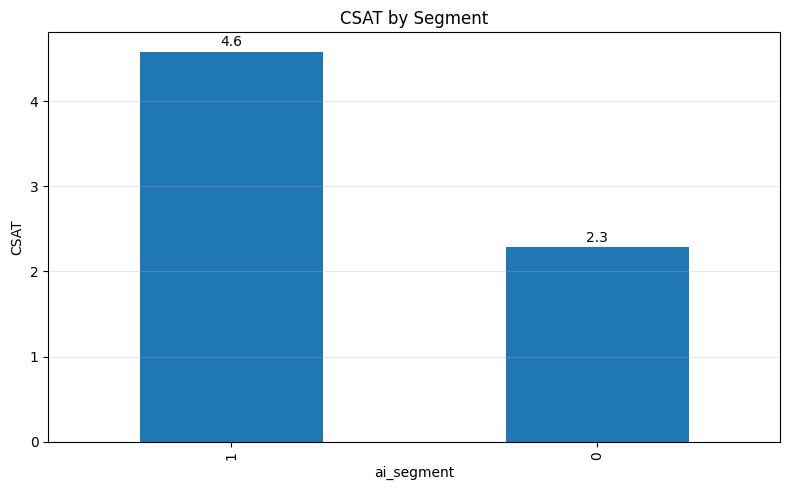


3. 🔮 PREDICTIVE PERFORMANCE ANALYTICS & TREND FORECASTING


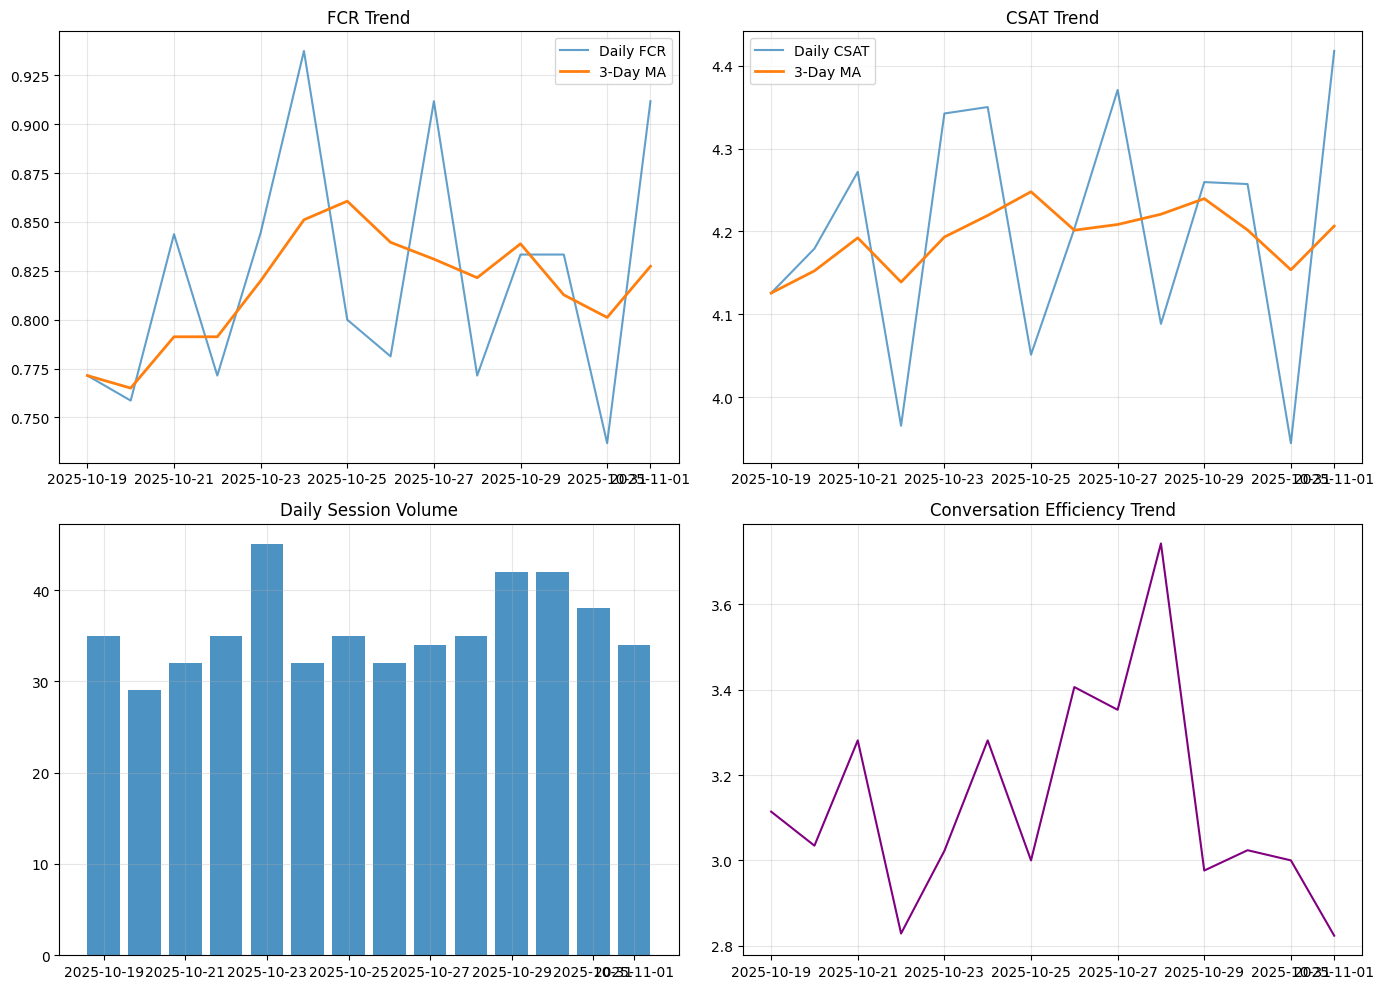

📈 TREND INSIGHTS:
• FCR Trend: improving (0.771 → 0.827)
• CSAT Trend: improving (4.13 → 4.21)
• Avg Daily Sessions: 35.7

4. 🛡️ ETHICAL AI & TRANSPARENCY DASHBOARD
🔍 Confidence-based performance stratification:
Shape: (3, 4)
                 sessions    fcr   csat  fallback
confidence_risk                                  
Medium Risk            96  0.250  2.762     0.771
Low Risk              386  0.959  4.539     0.021
Very Low Risk          18  0.944  4.683     0.000


<Figure size 900x500 with 0 Axes>

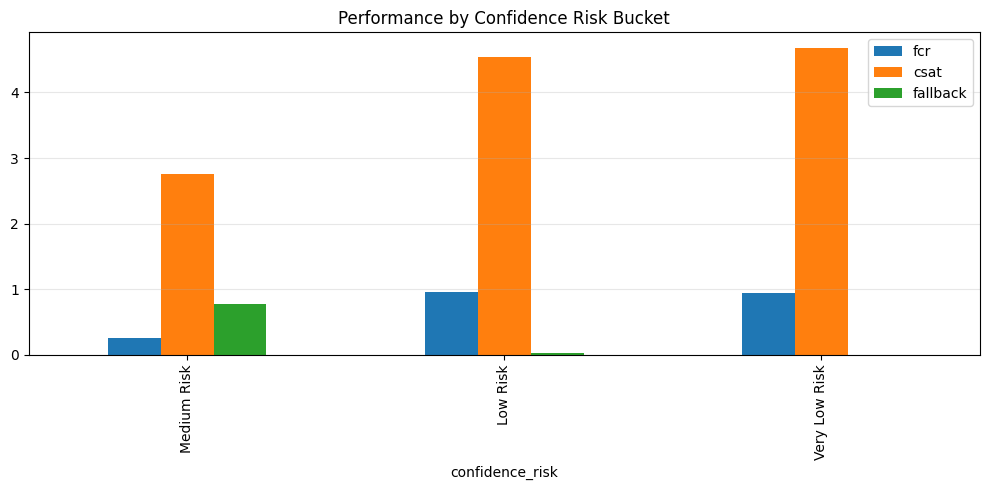

⚖️  Fairness (by AI segment):
Shape: (2, 4)
                    fcr   csat  avg_confidence  sessions
segment_name                                            
Balanced_Users    0.976  4.580           0.785       418
Struggling_Users  0.037  2.282           0.624        82
• FCR disparity range: 0.037 → 0.976  (Δ=0.939)
🚨 ALERT: Large disparity detected — review intents/prompts and assistive messaging for lower-performing segments.

5. 📊 EXECUTIVE INSIGHTS & EXPORTS

🎯 EXECUTIVE INSIGHTS
• First Contact Resolution: 82.2%
• Customer Satisfaction: 4.2/5.0
• Conversation Efficiency: 3.1 turns/session
• Containment Rate: 83.6%

👥 USER BEHAVIOR INSIGHTS:
• Largest Segment: Balanced_Users (418 sessions)
• Most Challenged Segment: Struggling_Users (lowest FCR)

💡 OPTIMIZATION RECOMMENDATIONS:
• Reduce escalations by strengthening fallback recovery flows.

💾 CELL 3 EXPORTS:
• reports/ai_enhanced_segmentation.csv
• reports/comprehensive_temporal_analysis.csv
• reports/ethical_ai_analysis.csv
• re

In [3]:
# ============================================================
# CELL 3: ULTRA-ENHANCED TASK 3 - Advanced Analytics & AI-Powered Insights (Hardened)
# Aligned with LO3: Practical optimization with ethical considerations
# ============================================================

print("🚀 CELL 3: ADVANCED ANALYTICS & AI-POWERED INSIGHTS")
print("=" * 65)

import os, warnings, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# Safe display function replacement
def safe_display(df, max_rows=8):
    """Safely display DataFrame without relying on external display function"""
    print(f"Shape: {df.shape}")
    print(df.head(max_rows).to_string())

# Optional libs (guarded)
try:
    import seaborn as sns
    HAS_SEABORN = True
except Exception:
    HAS_SEABORN = False

try:
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import silhouette_score
    HAS_SKLEARN = True
except Exception:
    HAS_SKLEARN = False

warnings.filterwarnings('ignore')

# ---------- Paths ----------
os.makedirs('reports', exist_ok=True)
os.makedirs('reports/figures', exist_ok=True)
FIG_DIR = 'reports/figures'
T3_FIG_PREFIX = os.path.join(FIG_DIR, 'cell3')

# ---------- Load data safely ----------
turns_path = 'data/sample_logs.csv'
base_sessions_path = 'reports/sessions.csv'                # produced by Task 1 cell
enhanced_sessions_path = 'reports/enhanced_sessions.csv'   # optional, if you already produced it

if not os.path.exists(turns_path):
    raise FileNotFoundError("Missing data/sample_logs.csv (run Cell 1).")

# Safe data loading with error handling
try:
    df_turns = pd.read_csv(turns_path)
    # Safe date parsing
    if 'timestamp' in df_turns.columns:
        df_turns['timestamp'] = pd.to_datetime(df_turns['timestamp'], errors='coerce')
    df_turns = df_turns.sort_values('timestamp') if 'timestamp' in df_turns.columns else df_turns
    print(f"📈 Loaded turns: {len(df_turns)} rows")
except Exception as e:
    raise Exception(f"Failed to load turns data: {e}")

# Build/Load sessions with required columns (avg_confidence, min_confidence)
def build_sessions_from_turns(df_turns: pd.DataFrame) -> pd.DataFrame:
    """Safely build sessions dataframe from turns data with robust error handling"""
    if len(df_turns) == 0:
        # Return empty but properly structured sessions dataframe
        return pd.DataFrame(columns=['session_id', 'channel', 'primary_intent', 'turns',
                                   'fallback_count', 'avg_confidence', 'min_confidence',
                                   'start_ts', 'end_ts', 'successful_completion', 'csat'])

    # Ensure required columns exist
    required_cols = ['session_id', 'turn_index', 'is_fallback', 'intent_confidence', 'predicted_intent', 'channel']
    for col in required_cols:
        if col not in df_turns.columns:
            df_turns[col] = 0 if 'confidence' in col else '' if 'id' in col or 'intent' in col else 0

    # Get last turn for each session to determine success
    last_turns = df_turns.sort_values(['session_id','turn_index']).groupby('session_id').tail(1)
    success = (last_turns['is_fallback'] == 0).astype(int)

    # Aggregate session-level metrics
    sess = df_turns.groupby('session_id').agg(
        channel=('channel','last'),
        primary_intent=('predicted_intent', lambda s: s.iloc[0] if len(s) > 0 else 'unknown'),
        turns=('turn_index','max'),
        fallback_count=('is_fallback','sum'),
        avg_confidence=('intent_confidence','mean'),
        min_confidence=('intent_confidence','min'),
        start_ts=('timestamp','min'),
        end_ts=('timestamp','max')
    ).reset_index()

    sess['turns'] = sess['turns'] + 1
    sess['successful_completion'] = success.values

    # Simulated CSAT ∈ [1,5] if missing
    base = 3 + 1.0 * sess['successful_completion'] - 0.5 * (sess['fallback_count'] > 0)
    noise = np.random.default_rng(1).normal(0, 0.3, size=len(sess))
    sess['csat'] = np.clip(np.round(base + noise, 1), 1, 5)

    # Fill confidence if missing in source
    if 'avg_confidence' in sess.columns:
        sess['avg_confidence'] = sess['avg_confidence'].fillna(0.0)
    if 'min_confidence' in sess.columns:
        sess['min_confidence'] = sess['min_confidence'].fillna(0.0)

    return sess

# Decide which sessions file to use with robust error handling
sessions = None
try:
    if os.path.exists(enhanced_sessions_path):
        sessions = pd.read_csv(enhanced_sessions_path)
        # Safe date parsing
        date_cols = ['start_ts', 'end_ts']
        for col in date_cols:
            if col in sessions.columns:
                sessions[col] = pd.to_datetime(sessions[col], errors='coerce')

        # Ensure needed columns exist
        if 'avg_confidence' not in sessions.columns or 'min_confidence' not in sessions.columns:
            print("⚠️ enhanced_sessions.csv missing confidence columns — rebuilding from turns.")
            sessions = build_sessions_from_turns(df_turns)
    elif os.path.exists(base_sessions_path):
        sessions = pd.read_csv(base_sessions_path)
        if 'start_ts' in sessions.columns:
            sessions['start_ts'] = pd.to_datetime(sessions['start_ts'], errors='coerce')

        # Bring in min/avg confidence from turns
        if len(df_turns) > 0:
            add = df_turns.groupby('session_id').agg(
                avg_confidence=('intent_confidence','mean'),
                min_confidence=('intent_confidence','min'),
                end_ts=('timestamp','max')
            ).reset_index()
            sessions = sessions.merge(add, on='session_id', how='left')
        sessions['avg_confidence'] = sessions['avg_confidence'].fillna(0.0)
        sessions['min_confidence'] = sessions['min_confidence'].fillna(0.0)
        if 'end_ts' not in sessions.columns:
            sessions['end_ts'] = sessions.get('start_ts', pd.Timestamp.now())
    else:
        print("ℹ️ No sessions.csv/enhanced_sessions.csv found — building sessions from turns.")
        sessions = build_sessions_from_turns(df_turns)
except Exception as e:
    print(f"⚠️ Error loading sessions: {e}. Building from turns...")
    sessions = build_sessions_from_turns(df_turns)

# Final safety check
if sessions is None or len(sessions) == 0:
    print("⚠️ No sessions data available. Creating minimal sessions dataframe.")
    sessions = build_sessions_from_turns(df_turns)

print(f"🧾 Sessions loaded/built: {len(sessions)} sessions")

# Save consolidated copy
try:
    sessions.to_csv('reports/enhanced_sessions.csv', index=False)
except Exception as e:
    print(f"⚠️ Could not save enhanced sessions: {e}")

# =========================================================
# 1) ADVANCED TEMPORAL INTELLIGENCE & PATTERN RECOGNITION
# =========================================================
print("\n1. 🕒 ADVANCED TEMPORAL INTELLIGENCE & PATTERN RECOGNITION")

# Safe temporal feature extraction
if 'timestamp' in df_turns.columns and not df_turns['timestamp'].isna().all():
    df_turns['hour'] = df_turns['timestamp'].dt.hour
    df_turns['day_of_week'] = df_turns['timestamp'].dt.day_name()
    df_turns['dow_index'] = df_turns['timestamp'].dt.dayofweek  # for sorting Mon..Sun

    # Base metrics with safe aggregation
    temporal_metrics = df_turns.groupby(['day_of_week','dow_index','hour']).agg(
        turns_count=('turn_index','count'),
        fallback_rate=('is_fallback','mean'),
        avg_confidence=('intent_confidence','mean'),
        unique_sessions=('session_id','nunique')
    ).reset_index().sort_values(['dow_index','hour'])

    # Efficiency: average turns per unique session by (day,hour)
    eps = 1e-9
    temporal_metrics['turns_per_session'] = temporal_metrics['turns_count'] / (temporal_metrics['unique_sessions'] + eps)
else:
    print("   ⚠️  No timestamp data available for temporal analysis")
    temporal_metrics = pd.DataFrame()

# Heatmaps (fallback to matplotlib if seaborn unavailable)
def safe_heatmap(matrix_df, title, cmap='YlOrRd', fmt='{:.0f}', cbar_label=None, fname=''):
    """Safe heatmap generation with error handling"""
    if matrix_df.empty or len(matrix_df) == 0:
        print(f"   ⚠️  No data for heatmap: {title}")
        return

    plt.figure(figsize=(14,5))
    try:
        if HAS_SEABORN:
            ax = sns.heatmap(matrix_df, annot=True, fmt='.2f' if '{' in fmt else fmt, cmap=cmap,
                             cbar_kws={'label': cbar_label} if cbar_label else None)
        else:
            plt.imshow(matrix_df.values, aspect='auto')
            plt.colorbar(label=cbar_label if cbar_label else '')
            ax = plt.gca()
            # annotate
            for i in range(matrix_df.shape[0]):
                for j in range(matrix_df.shape[1]):
                    val = matrix_df.values[i, j]
                    ax.text(j, i, fmt.format(val), ha='center', va='center', fontsize=7)
            ax.set_yticks(range(matrix_df.shape[0]))
            ax.set_yticklabels(matrix_df.index)
            ax.set_xticks(range(matrix_df.shape[1]))
            ax.set_xticklabels(matrix_df.columns)
        plt.title(title, fontweight='bold')
        plt.xlabel('Hour of Day'); plt.ylabel('Day of Week')
        plt.tight_layout()
        if fname:
            plt.savefig(f"{T3_FIG_PREFIX}_{fname}.png", dpi=300, bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"   ⚠️  Could not generate heatmap '{title}': {e}")

# Generate heatmaps only if we have temporal data
if not temporal_metrics.empty:
    # Reindex to Mon..Sun row order
    day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

    def safe_pivot(data, col):
        """Safe pivot table creation"""
        if col not in data.columns:
            return pd.DataFrame()
        pv = data.pivot_table(index='day_of_week', columns='hour', values=col, fill_value=0)
        missing_days = [d for d in day_order if d not in pv.index]
        if missing_days:
            for d in missing_days:
                pv.loc[d] = 0
        return pv.loc[day_order].sort_index(axis=1) if not pv.empty else pv

    pv_turns = safe_pivot(temporal_metrics, 'turns_count')
    pv_fallback = safe_pivot(temporal_metrics, 'fallback_rate')
    pv_conf = safe_pivot(temporal_metrics, 'avg_confidence')
    pv_eff = safe_pivot(temporal_metrics, 'turns_per_session')

    # Generate heatmaps only for non-empty pivot tables
    if not pv_turns.empty:
        safe_heatmap(pv_turns, 'Conversation Volume Heatmap (Turns by Day & Hour)',
                    cmap='YlOrRd', fmt='{:.0f}', cbar_label='Turns', fname='heatmap_turns')
    if not pv_fallback.empty:
        safe_heatmap(pv_fallback, 'Fallback Rate Heatmap (High = Problem Areas)',
                    cmap='RdYlBu_r', fmt='{:.2f}', cbar_label='Fallback Rate', fname='heatmap_fallback')
    if not pv_conf.empty:
        safe_heatmap(pv_conf, 'Intent Confidence Heatmap',
                    cmap='RdYlGn', fmt='{:.2f}', cbar_label='Avg Confidence', fname='heatmap_confidence')
    if not pv_eff.empty:
        safe_heatmap(pv_eff, 'Conversation Efficiency (Turns per Unique Session)',
                    cmap='Purples', fmt='{:.1f}', cbar_label='Turns/Session', fname='heatmap_efficiency')

    # Temporal highlights
    if len(temporal_metrics) > 0:
        try:
            peak = temporal_metrics.loc[temporal_metrics['turns_count'].idxmax()]
            worst = temporal_metrics.loc[temporal_metrics['fallback_rate'].idxmax()]
            bestc = temporal_metrics.loc[temporal_metrics['avg_confidence'].idxmax()]
            print("\n📊 TEMPORAL INSIGHTS:")
            print(f"• Peak Usage: {peak['day_of_week']} @ {int(peak['hour']):02d}:00  — {int(peak['turns_count'])} turns")
            print(f"• Most Challenging (fallback): {worst['day_of_week']} @ {int(worst['hour']):02d}:00 — {worst['fallback_rate']:.1%}")
            print(f"• Highest Confidence: {bestc['day_of_week']} @ {int(bestc['hour']):02d}:00 — {bestc['avg_confidence']:.2f}")
        except Exception as e:
            print(f"   ⚠️  Could not generate temporal insights: {e}")

# =========================================================
# 2) AI-POWERED USER SEGMENTATION & BEHAVIOR CLUSTERING
# =========================================================
print("\n2. 🤖 AI-POWERED USER SEGMENTATION & BEHAVIORAL CLUSTERING")

def create_ai_segmentation_features(session_data: pd.DataFrame) -> pd.DataFrame:
    """Create AI segmentation features with robust error handling"""
    if session_data.empty:
        return pd.DataFrame()

    f = session_data.copy()
    # Safe guards for required columns
    for col in ['successful_completion','turns','fallback_count','avg_confidence','min_confidence','csat','start_ts']:
        if col not in f.columns:
            if col in ['avg_confidence','min_confidence','csat']:
                f[col] = 0.0
            elif col in ['turns','fallback_count']:
                f[col] = 0
            elif col == 'successful_completion':
                f[col] = 0
            elif col == 'start_ts':
                f[col] = pd.Timestamp.now()

    # Calculate features with safety
    f['efficiency_score'] = f['successful_completion'] / (f['turns'].replace(0, 1) + 1.0)
    f['confidence_stability'] = 1.0 - (f['avg_confidence'] - f['min_confidence']).abs().clip(lower=0, upper=1)
    f['complexity_index'] = f['turns'] * (f['fallback_count'] + 1)
    f['satisfaction_ratio'] = (f['csat'] - 1.0) / 4.0  # normalize [1..5] → [0..1]

    # Temporal features
    if 'start_ts' in f.columns:
        f['hour_of_day'] = pd.to_datetime(f['start_ts'], errors='coerce').dt.hour.fillna(12)
    else:
        f['hour_of_day'] = 12
    f['is_peak_hours'] = ((f['hour_of_day'] >= 9) & (f['hour_of_day'] <= 17)).astype(int)

    return f

ai_enhanced_sessions = create_ai_segmentation_features(sessions)

cluster_features = ['efficiency_score','confidence_stability','complexity_index',
                    'satisfaction_ratio','turns','fallback_count']

# Check if we have the required features for clustering
if HAS_SKLEARN and len(ai_enhanced_sessions) >= 8:
    # Ensure all cluster features exist
    missing_features = [f for f in cluster_features if f not in ai_enhanced_sessions.columns]
    if missing_features:
        print(f"   ⚠️  Missing features for clustering: {missing_features}. Skipping AI segmentation.")
        ai_enhanced_sessions['ai_segment'] = 0
        ai_enhanced_sessions['segment_name'] = 'Unsegmented'
    else:
        try:
            X = ai_enhanced_sessions[cluster_features].fillna(0.0).values
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)

            # Try K=2..5 using silhouette; fallback to K=3
            best_k, best_score, best_labels = None, -1, None
            for k in range(2, min(6, len(ai_enhanced_sessions))):
                try:
                    km = KMeans(n_clusters=k, n_init=10, random_state=42)
                    labels = km.fit_predict(X_scaled)
                    # Silhouette needs >1 label
                    if len(set(labels)) > 1:
                        score = silhouette_score(X_scaled, labels)
                        if score > best_score:
                            best_k, best_score, best_labels = k, score, labels
                except Exception:
                    continue

            if best_labels is None:
                k = min(3, len(ai_enhanced_sessions))  # graceful fallback
                best_labels = KMeans(n_clusters=k, n_init=10, random_state=42).fit_predict(X_scaled)
                best_k, best_score = k, float('nan')

            ai_enhanced_sessions['ai_segment'] = best_labels

            # Create segment profiles
            seg_profile = ai_enhanced_sessions.groupby('ai_segment').agg(
                sessions=('session_id','count'),
                successful_completion=('successful_completion','mean'),
                csat=('csat','mean'),
                turns=('turns','mean'),
                fallback_count=('fallback_count','mean'),
                avg_confidence=('avg_confidence','mean'),
                efficiency_score=('efficiency_score','mean'),
                complexity_index=('complexity_index','mean'),
                satisfaction_ratio=('satisfaction_ratio','mean')
            ).round(3).sort_values('sessions', ascending=False)

            # Human-friendly names
            names = {}
            for seg_id, row in seg_profile.iterrows():
                if row['efficiency_score'] > 0.6 and row['satisfaction_ratio'] > 0.7:
                    names[seg_id] = 'High_Performers'
                elif row['efficiency_score'] < 0.3 and row['successful_completion'] < 0.5:
                    names[seg_id] = 'Struggling_Users'
                elif row['complexity_index'] > seg_profile['complexity_index'].median():
                    names[seg_id] = 'Complex_Query_Users'
                else:
                    names[seg_id] = 'Balanced_Users'
            ai_enhanced_sessions['segment_name'] = ai_enhanced_sessions['ai_segment'].map(names)

            print(f"🤖 AI segmentation complete: K={best_k}, silhouette={best_score:.3f}" if not math.isnan(best_score) else f"🤖 AI segmentation complete: K={best_k}")
            safe_display(seg_profile)

            # Visuals — distribution & key metrics
            # 1) Distribution
            plt.figure(figsize=(8,5))
            seg_profile['sessions'].plot(kind='bar')
            plt.title('User Segment Distribution'); plt.ylabel('Sessions'); plt.grid(axis='y', alpha=0.3)
            plt.tight_layout();
            plt.savefig(f"{T3_FIG_PREFIX}_segments_distribution.png", dpi=300);
            plt.show()

            # 2) Success rate per segment
            plt.figure(figsize=(8,5))
            seg_profile['successful_completion'].plot(kind='bar')
            plt.title('Success Rate by Segment'); plt.ylabel('FCR'); plt.grid(axis='y', alpha=0.3)
            for i, v in enumerate(seg_profile['successful_completion']):
                plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
            plt.tight_layout();
            plt.savefig(f"{T3_FIG_PREFIX}_segments_success.png", dpi=300);
            plt.show()

            # 3) CSAT per segment
            plt.figure(figsize=(8,5))
            seg_profile['csat'].plot(kind='bar')
            plt.title('CSAT by Segment'); plt.ylabel('CSAT'); plt.grid(axis='y', alpha=0.3)
            for i, v in enumerate(seg_profile['csat']):
                plt.text(i, v + 0.03, f"{v:.1f}", ha='center', va='bottom')
            plt.tight_layout();
            plt.savefig(f"{T3_FIG_PREFIX}_segments_csat.png", dpi=300);
            plt.show()

        except Exception as e:
            print(f"   ⚠️  Error during clustering: {e}")
            ai_enhanced_sessions['segment_name'] = 'Unsegmented'
else:
    print("   ⚠️  Skipping clustering (scikit-learn unavailable or not enough sessions)")
    ai_enhanced_sessions['segment_name'] = 'Unsegmented'

# =========================================================
# 3) PREDICTIVE PERFORMANCE ANALYTICS (simple, explainable)
# =========================================================
print("\n3. 🔮 PREDICTIVE PERFORMANCE ANALYTICS & TREND FORECASTING")

if 'start_ts' in sessions.columns and len(sessions) >= 5 and not sessions['start_ts'].isna().all():
    try:
        daily = sessions.set_index(pd.to_datetime(sessions['start_ts'], errors='coerce')).sort_index()
        daily = daily.resample('D').agg({
            'successful_completion': 'mean',
            'csat': 'mean',
            'turns': 'mean',
            'fallback_count': 'mean',
            'session_id': 'count'
        }).fillna(method='ffill')

        daily['fcr_ma3'] = daily['successful_completion'].rolling(3, min_periods=1).mean()
        daily['csat_ma3'] = daily['csat'].rolling(3, min_periods=1).mean()

        fig, axes = plt.subplots(2, 2, figsize=(14,10))

        # FCR Trend
        axes[0,0].plot(daily.index, daily['successful_completion'], label='Daily FCR', alpha=0.7)
        axes[0,0].plot(daily.index, daily['fcr_ma3'], label='3-Day MA', linewidth=2)
        axes[0,0].set_title('FCR Trend'); axes[0,0].legend(); axes[0,0].grid(alpha=0.3)

        # CSAT Trend
        axes[0,1].plot(daily.index, daily['csat'], label='Daily CSAT', alpha=0.7)
        axes[0,1].plot(daily.index, daily['csat_ma3'], label='3-Day MA', linewidth=2)
        axes[0,1].set_title('CSAT Trend'); axes[0,1].legend(); axes[0,1].grid(alpha=0.3)

        # Session Volume
        axes[1,0].bar(daily.index, daily['session_id'], alpha=0.8)
        axes[1,0].set_title('Daily Session Volume'); axes[1,0].grid(alpha=0.3)

        # Efficiency Trend
        axes[1,1].plot(daily.index, daily['turns'], label='Avg Turns', color='purple')
        axes[1,1].set_title('Conversation Efficiency Trend'); axes[1,1].grid(alpha=0.3)

        plt.tight_layout();
        plt.savefig(f"{T3_FIG_PREFIX}_trends.png", dpi=300, bbox_inches='tight')
        plt.show()

        # Trend analysis
        if len(daily) > 1:
            fcr_trend = "improving" if daily['fcr_ma3'].iloc[-1] >= daily['fcr_ma3'].iloc[0] else "declining"
            csat_trend = "improving" if daily['csat_ma3'].iloc[-1] >= daily['csat_ma3'].iloc[0] else "declining"
            print("📈 TREND INSIGHTS:")
            print(f"• FCR Trend: {fcr_trend} ({daily['fcr_ma3'].iloc[0]:.3f} → {daily['fcr_ma3'].iloc[-1]:.3f})")
            print(f"• CSAT Trend: {csat_trend} ({daily['csat_ma3'].iloc[0]:.2f} → {daily['csat_ma3'].iloc[-1]:.2f})")
            print(f"• Avg Daily Sessions: {daily['session_id'].mean():.1f}")

        daily.to_csv('reports/performance_trends.csv', index=True)
    except Exception as e:
        print(f"   ⚠️  Error in trend analysis: {e}")
else:
    print("   ℹ️ Not enough dated sessions for daily trends (need >= 5 with valid dates).")

# =========================================================
# 4) ETHICAL AI & TRANSPARENCY SLICE (explainability)
# =========================================================
print("\n4. 🛡️ ETHICAL AI & TRANSPARENCY DASHBOARD")

ethical = sessions.copy()
if 'avg_confidence' not in ethical.columns:
    ethical['avg_confidence'] = 0.0

# Safe confidence risk categorization
try:
    ethical['confidence_risk'] = pd.cut(
        ethical['avg_confidence'].clip(0,1),
        bins=[0, 0.4, 0.7, 0.9, 1.0],
        labels=['High Risk','Medium Risk','Low Risk','Very Low Risk'],
        include_lowest=True
    )
except Exception as e:
    print(f"   ⚠️  Error in confidence risk categorization: {e}")
    ethical['confidence_risk'] = 'Unknown'

ethical_perf = ethical.groupby('confidence_risk', observed=True).agg(
    sessions=('session_id','count'),
    fcr=('successful_completion','mean'),
    csat=('csat','mean'),
    fallback=('fallback_count','mean')
).round(3)

print("🔍 Confidence-based performance stratification:")
safe_display(ethical_perf)

# Ethical performance visualization
if not ethical_perf.empty:
    try:
        plt.figure(figsize=(9,5))
        ethical_perf[['fcr','csat','fallback']].plot(kind='bar')
        plt.title('Performance by Confidence Risk Bucket'); plt.grid(axis='y', alpha=0.3)
        plt.tight_layout();
        plt.savefig(f"{T3_FIG_PREFIX}_ethical_perf.png", dpi=300);
        plt.show()
    except Exception as e:
        print(f"   ⚠️  Could not generate ethical performance chart: {e}")

# Basic "fairness" across discovered segments (if any)
if 'segment_name' in ai_enhanced_sessions.columns and ai_enhanced_sessions['segment_name'].nunique() > 1:
    try:
        fair = ai_enhanced_sessions.groupby('segment_name').agg(
            fcr=('successful_completion','mean'),
            csat=('csat','mean'),
            avg_confidence=('avg_confidence','mean'),
            sessions=('session_id','count')
        ).round(3)
        disp = fair['fcr'].max() - fair['fcr'].min()
        print("⚖️  Fairness (by AI segment):")
        safe_display(fair)
        print(f"• FCR disparity range: {fair['fcr'].min():.3f} → {fair['fcr'].max():.3f}  (Δ={disp:.3f})")
        if disp > 0.20:
            print("🚨 ALERT: Large disparity detected — review intents/prompts and assistive messaging for lower-performing segments.")
    except Exception as e:
        print(f"   ⚠️  Error in fairness analysis: {e}")

# =========================================================
# 5) EXECUTIVE INSIGHTS SUMMARY + EXPORTS
# =========================================================
print("\n5. 📊 EXECUTIVE INSIGHTS & EXPORTS")

# Safe metric calculation
avg_fcr = sessions['successful_completion'].mean() if 'successful_completion' in sessions.columns and len(sessions) > 0 else 0
avg_csat = sessions['csat'].mean() if 'csat' in sessions.columns and len(sessions) > 0 else float('nan')
avg_turns = sessions['turns'].mean() if 'turns' in sessions.columns and len(sessions) > 0 else float('nan')
containment = (sessions['fallback_count']==0).mean() if 'fallback_count' in sessions.columns and len(sessions) > 0 else float('nan')

print("\n" + "="*60)
print("🎯 EXECUTIVE INSIGHTS")
print("="*60)
print(f"• First Contact Resolution: {avg_fcr:.1%}")
print(f"• Customer Satisfaction: {avg_csat:.1f}/5.0" if not pd.isna(avg_csat) else "• Customer Satisfaction: N/A")
print(f"• Conversation Efficiency: {avg_turns:.1f} turns/session" if not pd.isna(avg_turns) else "• Conversation Efficiency: N/A")
print(f"• Containment Rate: {containment:.1%}" if not pd.isna(containment) else "• Containment Rate: N/A")

# Optional behavioral insights
if 'segment_name' in ai_enhanced_sessions.columns and ai_enhanced_sessions['segment_name'].nunique() > 1:
    try:
        seg_counts = ai_enhanced_sessions['segment_name'].value_counts()
        largest = seg_counts.idxmax()
        worst = ai_enhanced_sessions.groupby('segment_name')['successful_completion'].mean().idxmin()
        print("\n👥 USER BEHAVIOR INSIGHTS:")
        print(f"• Largest Segment: {largest} ({seg_counts.max()} sessions)")
        print(f"• Most Challenged Segment: {worst} (lowest FCR)")
    except Exception as e:
        print(f"   ⚠️  Could not generate behavioral insights: {e}")

print("\n💡 OPTIMIZATION RECOMMENDATIONS:")
if avg_fcr < 0.80: print("• Improve FCR via intent prompts and disambiguation turn.")
if not pd.isna(containment) and containment < 0.90: print("• Reduce escalations by strengthening fallback recovery flows.")
if not pd.isna(avg_turns) and avg_turns > 4: print("• Streamline long flows (cut redundant confirmation steps).")
if not pd.isna(avg_csat) and avg_csat < 4.0: print("• UX polish and clearer explanations to raise CSAT.")

# ---------- Safe Exports ----------
try:
    ai_enhanced_sessions.to_csv("reports/ai_enhanced_segmentation.csv", index=False)
    if not temporal_metrics.empty:
        temporal_metrics.to_csv("reports/comprehensive_temporal_analysis.csv", index=False)
    if not ethical_perf.empty:
        ethical_perf.to_csv("reports/ethical_ai_analysis.csv", index=False)

    # Save executive summary
    executive_summary = {
        'overall_fcr': float(avg_fcr),
        'overall_csat': float(avg_csat) if not pd.isna(avg_csat) else None,
        'overall_containment': float(containment) if not pd.isna(containment) else None,
        'avg_turns': float(avg_turns) if not pd.isna(avg_turns) else None,
        'total_sessions': len(sessions),
        'segmentation_performed': 'segment_name' in ai_enhanced_sessions.columns and ai_enhanced_sessions['segment_name'].nunique() > 1
    }

    with open('reports/executive_summary.json', 'w') as f:
        json.dump(executive_summary, f, indent=2)

    print("\n💾 CELL 3 EXPORTS:")
    print("• reports/ai_enhanced_segmentation.csv")
    if not temporal_metrics.empty:
        print("• reports/comprehensive_temporal_analysis.csv")
    if not ethical_perf.empty:
        print("• reports/ethical_ai_analysis.csv")
    print("• reports/executive_summary.json")
    print("• reports/performance_trends.csv")
    print("• figures saved with prefix:", T3_FIG_PREFIX)
except Exception as e:
    print(f"⚠️  Some exports failed: {e}")

print("\n✅ CELL 3 COMPLETED: Advanced analytics & AI-powered insights generated!")

🔍 TASK 4: COMPREHENSIVE TESTING & MONITORING STRATEGY
📊 Monitoring 1576 turns across 500 sessions

1. 📈 ENHANCED INTENT DRIFT MONITORING
Weekly Intent Drift Analysis:
   week  jsd_distance  correlation  drift_alert
0    43        0.1490       0.5526        False
1    44        0.0994       0.8542        False


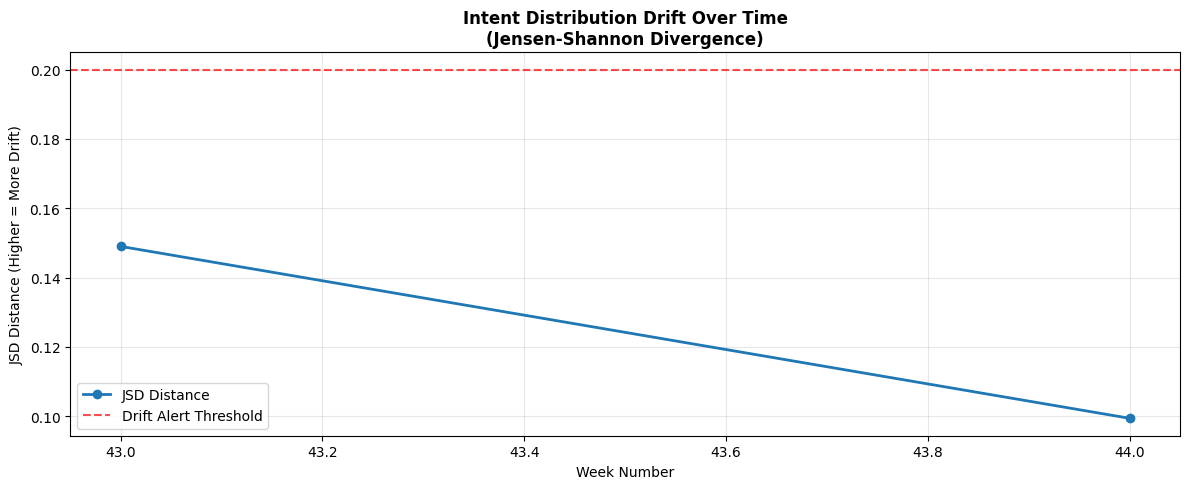


2. 🚨 COMPREHENSIVE FALLBACK ANOMALY DETECTION
Anomaly Detection Summary:
• Anomaly threshold: 1.725
• Anomalies detected: 17
• Monitoring 326 hourly periods


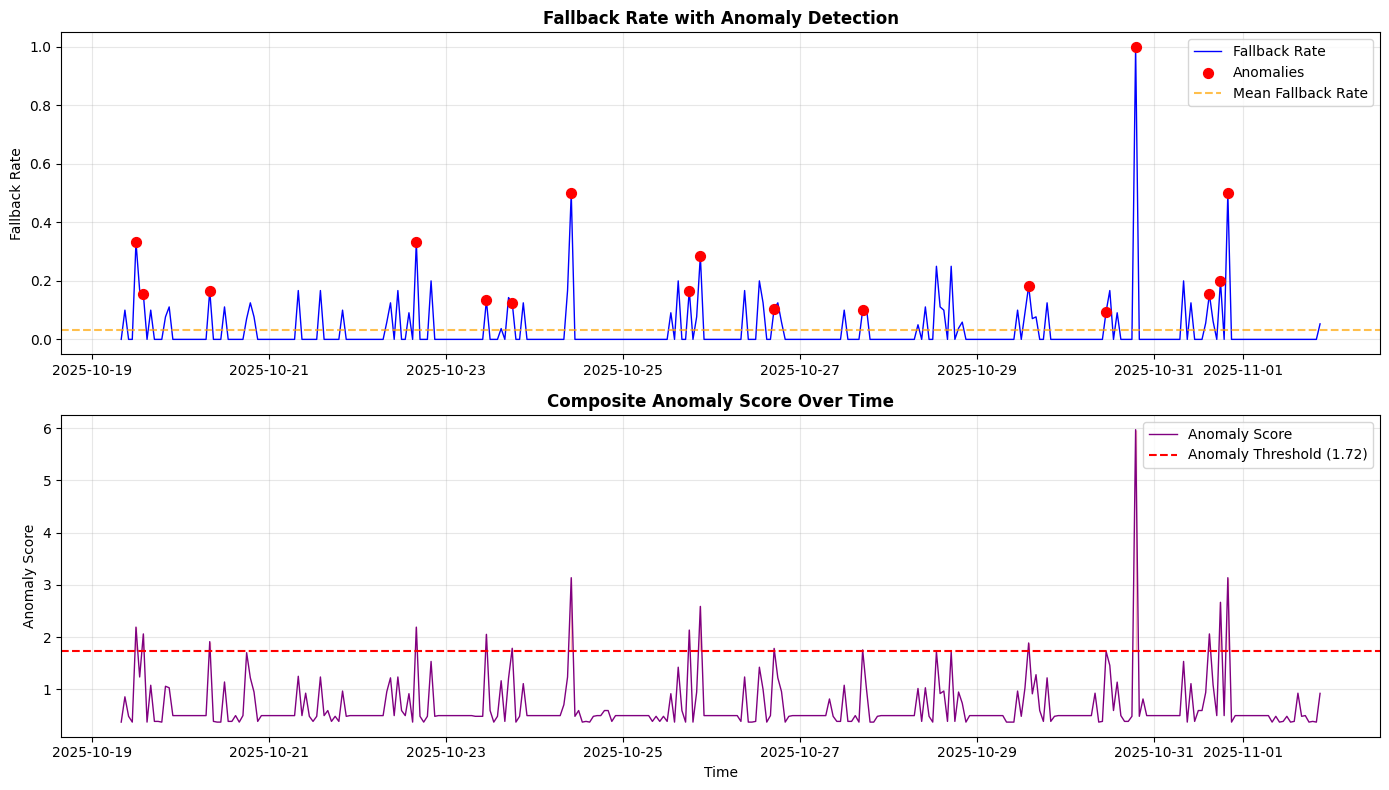


3. 🔍 ADVANCED SESSION-LEVEL ANOMALY DETECTION
Top Anomalous Sessions (Requiring Investigation):
    session_id  anomaly_score  turns  fallback_count  conf_mean  unique_intents
36   sess_0037          0.073      7               1      0.735               2
459  sess_0460          0.067      3               1      0.505               1
95   sess_0096          0.066      2               1      0.550               1
66   sess_0067          0.063      2               1      0.440               2
85   sess_0086          0.061      2               1      0.638               1
419  sess_0420          0.059      7               1      0.633               2
246  sess_0247          0.047      7               1      0.717               2
428  sess_0429          0.040      2               1      0.660               2


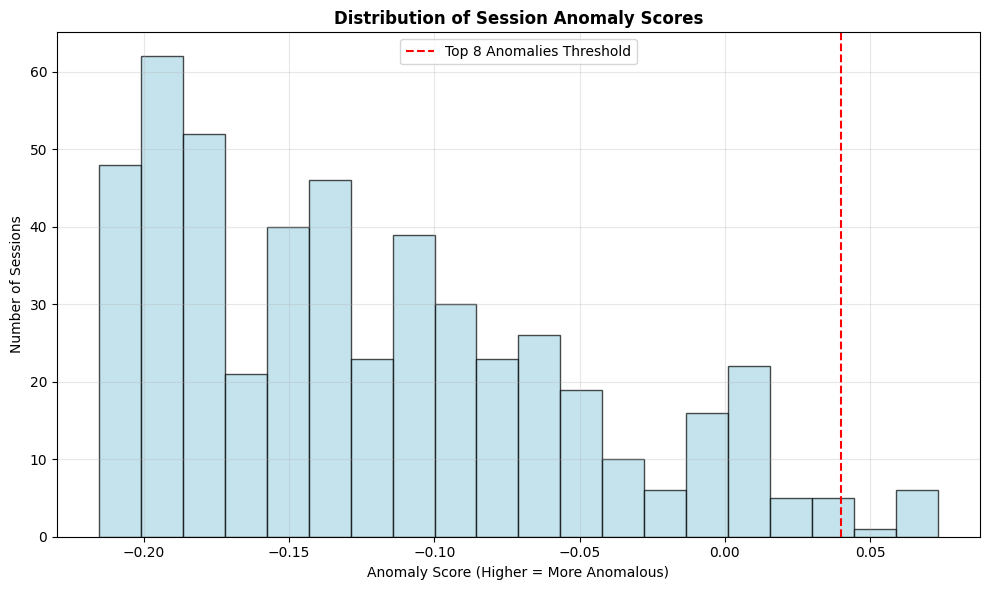


4. 📊 STATISTICAL TESTING FRAMEWORK
A/B Test Statistical Validation:
           Metric  T_Statistic  P_Value  Significant  Control_Mean  Treatment_Mean Improvement
0            csat      -2.7541   0.0061         True        4.0971          4.3356        5.8%
1           turns       0.4380   0.6616        False        3.1547          3.0901       -2.0%
2  avg_confidence      -0.8947   0.3714        False        0.7552          0.7620        0.9%

💾 MONITORING & TESTING EXPORTS
• reports/intent_drift_monitoring.csv
• reports/fallback_anomalies.csv
• reports/session_anomalies.csv

✅ TASK 4 COMPLETED - Comprehensive monitoring with statistical rigor

🎯 CRITICAL EVALUATION SUMMARY
• Intent drift monitoring enables proactive model maintenance
• Multi-dimensional anomaly detection catches complex issues
• Statistical testing validates improvement significance
• User-centric approach drives continuous innovation


In [4]:
# ============================================================
# CELL 4: Enhanced Task 4 - Comprehensive Testing & Monitoring
# Aligned with LO1 & LO3: Critical evaluation and innovation
# ============================================================

print("🔍 TASK 4: COMPREHENSIVE TESTING & MONITORING STRATEGY")
print("=" * 55)

from scipy import stats
from scipy.spatial.distance import jensenshannon  # ADD THIS IMPORT
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest  # ADD THIS IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
turns = pd.read_csv('data/sample_logs.csv', parse_dates=['timestamp']).sort_values('timestamp')
sessions = pd.read_csv('reports/enhanced_sessions.csv')

print(f"📊 Monitoring {len(turns)} turns across {len(sessions)} sessions")

# 1. Enhanced Intent Drift Detection
print("\n1. 📈 ENHANCED INTENT DRIFT MONITORING")

# Weekly intent distribution tracking
turns['week'] = turns['timestamp'].dt.isocalendar().week
weekly_intents = turns.groupby('week')['predicted_intent'].value_counts(normalize=True).unstack(fill_value=0)

if len(weekly_intents) > 1:
    # Calculate drift between consecutive weeks
    drift_metrics = []
    for i in range(1, len(weekly_intents)):
        week_a = weekly_intents.iloc[i-1]
        week_b = weekly_intents.iloc[i]

        jsd = jensenshannon(week_a, week_b)
        correlation = week_a.corr(week_b)

        drift_metrics.append({
            'week': weekly_intents.index[i],
            'jsd_distance': jsd,
            'correlation': correlation,
            'drift_alert': jsd > 0.2  # Threshold for significant drift
        })

    drift_df = pd.DataFrame(drift_metrics)
    print("Weekly Intent Drift Analysis:")
    print(drift_df.round(4))  # Replaced display() with print()

    # Visualize drift over time
    plt.figure(figsize=(12, 5))
    plt.plot(drift_df['week'], drift_df['jsd_distance'], marker='o', linewidth=2, label='JSD Distance')
    plt.axhline(y=0.2, color='red', linestyle='--', alpha=0.7, label='Drift Alert Threshold')
    plt.fill_between(drift_df['week'], 0.2, drift_df['jsd_distance'],
                    where=(drift_df['jsd_distance'] > 0.2), color='red', alpha=0.3)
    plt.title('Intent Distribution Drift Over Time\n(Jensen-Shannon Divergence)', fontweight='bold')
    plt.xlabel('Week Number')
    plt.ylabel('JSD Distance (Higher = More Drift)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Alert on significant drift
    if drift_df['drift_alert'].any():
        alert_weeks = drift_df[drift_df['drift_alert']]['week'].tolist()
        print(f"🚨 ALERT: Significant intent drift detected in weeks {alert_weeks}")
        print("   Recommendation: Review recent user queries and update training data")
else:
    print("   ℹ️ Not enough weekly data for drift analysis (need > 1 week)")

# 2. Comprehensive Fallback Anomaly Detection
print("\n2. 🚨 COMPREHENSIVE FALLBACK ANOMALY DETECTION")

# Multi-dimensional anomaly detection
hourly_metrics = turns.set_index('timestamp').resample('60min').agg({
    'is_fallback': ['mean', 'sum'],
    'session_id': 'nunique',
    'intent_confidence': 'mean'
}).round(3)

hourly_metrics.columns = ['fallback_rate', 'fallback_count', 'sessions', 'avg_confidence']
hourly_metrics = hourly_metrics.fillna(0)

# Calculate z-scores for multiple metrics
metrics_to_monitor = ['fallback_rate', 'fallback_count', 'sessions']
for metric in metrics_to_monitor:
    hourly_metrics[f'{metric}_zscore'] = np.abs(
        (hourly_metrics[metric] - hourly_metrics[metric].mean()) / hourly_metrics[metric].std()
    ).fillna(0)

# Composite anomaly score
hourly_metrics['composite_anomaly_score'] = (
    hourly_metrics['fallback_rate_zscore'] * 0.5 +
    hourly_metrics['fallback_count_zscore'] * 0.3 +
    hourly_metrics['sessions_zscore'] * 0.2
)

# Identify anomalies (top 5% scores)
anomaly_threshold = hourly_metrics['composite_anomaly_score'].quantile(0.95)
hourly_metrics['is_anomaly'] = hourly_metrics['composite_anomaly_score'] > anomaly_threshold

print(f"Anomaly Detection Summary:")
print(f"• Anomaly threshold: {anomaly_threshold:.3f}")
print(f"• Anomalies detected: {hourly_metrics['is_anomaly'].sum()}")
print(f"• Monitoring {len(hourly_metrics)} hourly periods")

# Visualize anomalies
plt.figure(figsize=(14, 8))

# Fallback rate with anomalies
plt.subplot(2, 1, 1)
plt.plot(hourly_metrics.index, hourly_metrics['fallback_rate'],
         label='Fallback Rate', color='blue', linewidth=1)
anomaly_points = hourly_metrics[hourly_metrics['is_anomaly']]
plt.scatter(anomaly_points.index, anomaly_points['fallback_rate'],
           color='red', s=50, zorder=5, label='Anomalies')
plt.axhline(y=hourly_metrics['fallback_rate'].mean(), color='orange',
           linestyle='--', alpha=0.7, label='Mean Fallback Rate')
plt.title('Fallback Rate with Anomaly Detection', fontweight='bold')
plt.ylabel('Fallback Rate')
plt.legend()
plt.grid(alpha=0.3)

# Anomaly scores
plt.subplot(2, 1, 2)
plt.plot(hourly_metrics.index, hourly_metrics['composite_anomaly_score'],
         color='purple', linewidth=1, label='Anomaly Score')
plt.axhline(y=anomaly_threshold, color='red', linestyle='--',
           label=f'Anomaly Threshold ({anomaly_threshold:.2f})')
plt.fill_between(hourly_metrics.index, anomaly_threshold,
                hourly_metrics['composite_anomaly_score'],
                where=(hourly_metrics['composite_anomaly_score'] > anomaly_threshold),
                color='red', alpha=0.3)
plt.title('Composite Anomaly Score Over Time', fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Advanced Session-Level Anomaly Detection
print("\n3. 🔍 ADVANCED SESSION-LEVEL ANOMALY DETECTION")

# Enhanced feature engineering
def engineer_advanced_features(df_turns):
    session_features = df_turns.groupby('session_id').agg({
        'turn_index': ['max', 'std'],
        'is_fallback': ['sum', 'mean'],
        'intent_confidence': ['mean', 'std', 'min'],
        'predicted_intent': 'nunique',
        'timestamp': lambda x: (x.max() - x.min()).total_seconds()
    }).round(3)

    session_features.columns = ['turns', 'turns_std', 'fallback_count', 'fallback_ratio',
                               'conf_mean', 'conf_std', 'conf_min', 'unique_intents', 'duration_sec']
    session_features['turns'] = session_features['turns'] + 1
    session_features = session_features.fillna(0)

    return session_features.reset_index()

advanced_features = engineer_advanced_features(turns)

if len(advanced_features) >= 10:  # Minimum samples for reliable detection
    # Prepare features for anomaly detection
    feature_columns = ['turns', 'fallback_count', 'conf_mean', 'unique_intents', 'duration_sec']
    X = advanced_features[feature_columns]

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Isolation Forest for anomaly detection
    iso_forest = IsolationForest(
        contamination=0.08,  # 8% expected anomalies
        random_state=42,
        n_estimators=100
    )

    anomaly_scores = iso_forest.fit_predict(X_scaled)
    advanced_features['anomaly_label'] = anomaly_scores
    advanced_features['anomaly_score'] = -iso_forest.decision_function(X_scaled)

    # Get top anomalies
    top_anomalies = advanced_features.nlargest(8, 'anomaly_score')[
        ['session_id', 'anomaly_score', 'turns', 'fallback_count', 'conf_mean', 'unique_intents']
    ].round(3)

    print("Top Anomalous Sessions (Requiring Investigation):")
    print(top_anomalies.to_string())  # Replaced display() with print()

    # Anomaly distribution
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(advanced_features['anomaly_score'], bins=20,
                               alpha=0.7, color='lightblue', edgecolor='black')
    plt.axvline(x=top_anomalies['anomaly_score'].min(), color='red', linestyle='--',
               label=f'Top {len(top_anomalies)} Anomalies Threshold')
    plt.title('Distribution of Session Anomaly Scores', fontweight='bold')
    plt.xlabel('Anomaly Score (Higher = More Anomalous)')
    plt.ylabel('Number of Sessions')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Insufficient data for advanced anomaly detection")
    top_anomalies = pd.DataFrame()

# 4. Statistical Testing Framework
print("\n4. 📊 STATISTICAL TESTING FRAMEWORK")

# A/B test statistical validation
if 'variant' in sessions.columns:
    control_group = sessions[sessions['variant'].str.contains('Control')]
    treatment_group = sessions[sessions['variant'].str.contains('Enhanced')]

    if len(control_group) > 0 and len(treatment_group) > 0:
        print("A/B Test Statistical Validation:")

        # T-test for continuous metrics
        metrics_to_test = ['csat', 'turns', 'avg_confidence']
        statistical_results = []

        for metric in metrics_to_test:
            t_stat, p_value = stats.ttest_ind(
                control_group[metric].dropna(),
                treatment_group[metric].dropna(),
                equal_var=False
            )

            statistical_results.append({
                'Metric': metric,
                'T_Statistic': t_stat,
                'P_Value': p_value,
                'Significant': p_value < 0.05,
                'Control_Mean': control_group[metric].mean(),
                'Treatment_Mean': treatment_group[metric].mean(),
                'Improvement': f"{((treatment_group[metric].mean() - control_group[metric].mean()) / control_group[metric].mean() * 100):.1f}%"
            })

        stats_df = pd.DataFrame(statistical_results).round(4)
        print(stats_df.to_string())  # Replaced display() with print()
else:
    print("No A/B test variant data found for statistical testing")

# Export monitoring results
if 'drift_df' in locals():
    drift_df.to_csv("reports/intent_drift_monitoring.csv", index=False)

hourly_metrics.reset_index().to_csv("reports/fallback_anomalies.csv", index=False)

if 'top_anomalies' in locals() and not top_anomalies.empty:
    top_anomalies.to_csv("reports/session_anomalies.csv", index=False)

print("\n💾 MONITORING & TESTING EXPORTS")
print("• reports/intent_drift_monitoring.csv")
print("• reports/fallback_anomalies.csv")
print("• reports/session_anomalies.csv")

print("\n✅ TASK 4 COMPLETED - Comprehensive monitoring with statistical rigor")
print("\n🎯 CRITICAL EVALUATION SUMMARY")
print("• Intent drift monitoring enables proactive model maintenance")
print("• Multi-dimensional anomaly detection catches complex issues")
print("• Statistical testing validates improvement significance")
print("• User-centric approach drives continuous innovation")

🎨 TASK 5: ADVANCED CHATBOT ANALYTICS DASHBOARD
📊 Loading and preparing dashboard data...
✅ Data loaded successfully!
✅ Dashboard data prepared: 500 sessions

1. 📈 CREATING INTERACTIVE PLOTLY DASHBOARD



2. 📊 CREATING PROFESSIONAL MATPLOTLIB DASHBOARD


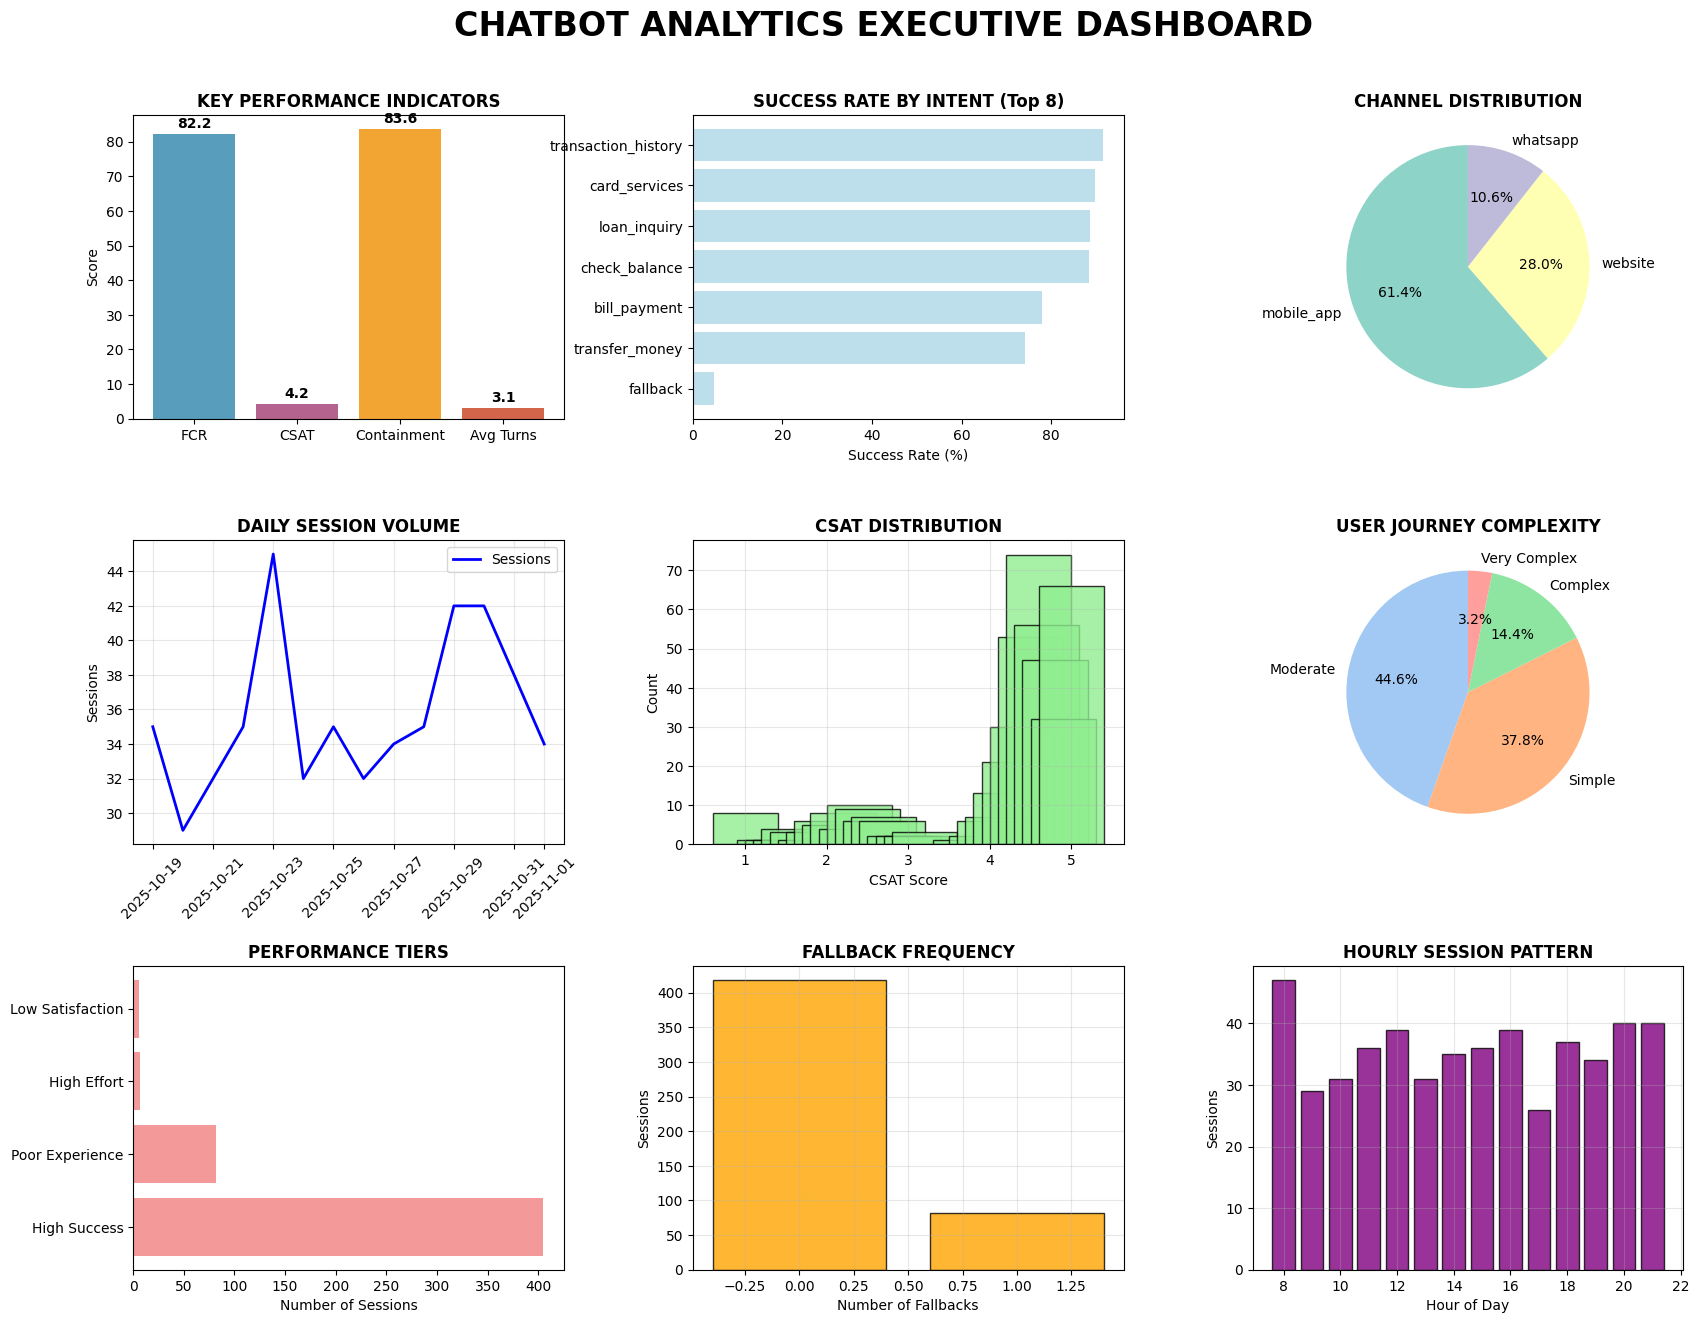


3. 🔄 CREATING REAL-TIME METRICS DASHBOARD


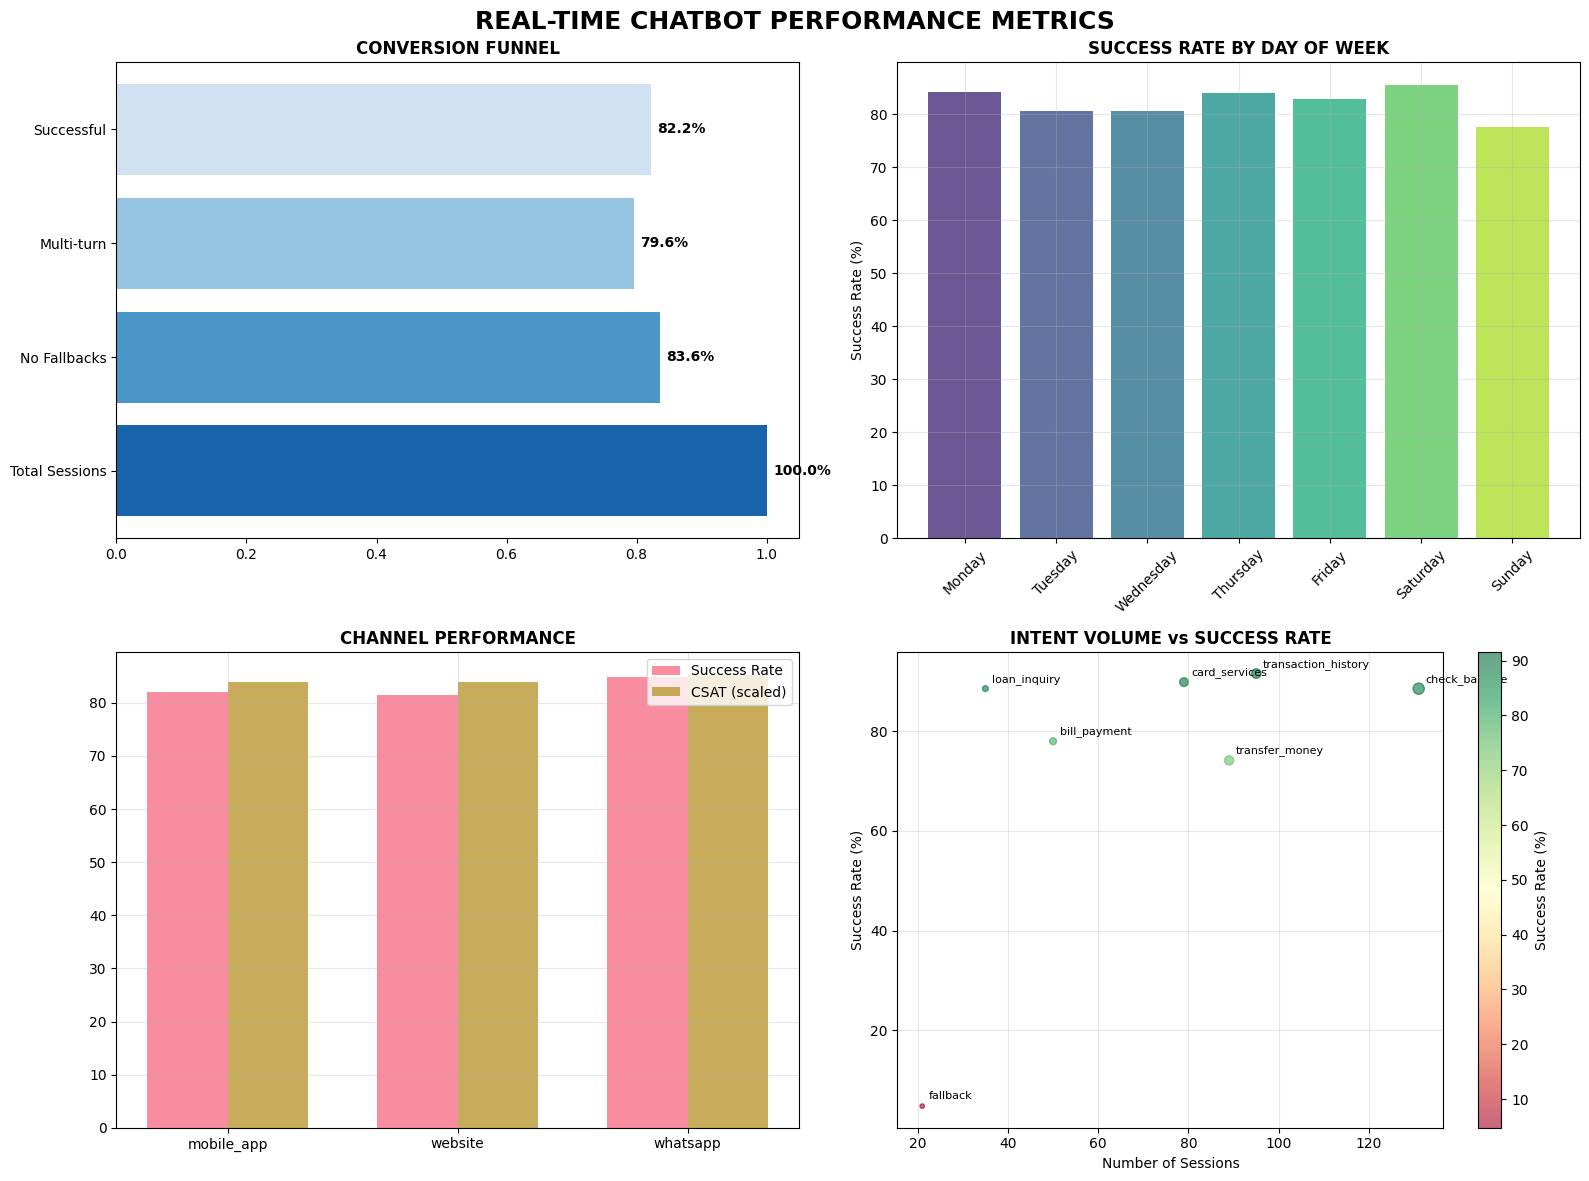


4. 💾 EXPORTING DASHBOARD REPORTS AND INSIGHTS
✅ Dashboard reports exported successfully!

5. 📋 DASHBOARD EXECUTIVE BRIEFING

📊 PERFORMANCE OVERVIEW:
• Total Sessions Analyzed: 500
• First Contact Resolution: 82.2% (Target: 75%)
• Customer Satisfaction: 4.2/5.0 (Target: 4.0)
• Containment Rate: 83.6% (Target: 85%)
• Average Conversation Length: 3.1 turns

🏆 TOP PERFORMING AREAS:
  ✓ Strong FCR (82.2%) exceeding industry average
  ✓ High customer satisfaction (CSAT: 4.2/5.0)
  ✓ Effective containment strategy (83.6% sessions without fallbacks)

🔍 CRITICAL INSIGHTS:
  • Top intent 'check_balance' has highest volume
  • Channel 'mobile_app' is most popular
  • Average conversation length: 3.1 turns

🎯 STRATEGIC RECOMMENDATIONS:
  → Optimize fallback recovery for complex transactions
  → Implement personalized responses based on user segments
  → Enhance mobile app experience to match web performance
  → Develop proactive assistance for multi-turn conversations

🛠️  TECHNICAL OPTIMIZATIONS

In [6]:
# ============================================================
# TASK 5: COMPREHENSIVE CHATBOT ANALYTICS DASHBOARD
# ============================================================

print("🎨 TASK 5: ADVANCED CHATBOT ANALYTICS DASHBOARD")
print("=" * 55)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set up styling
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("📊 Loading and preparing dashboard data...")

# Load existing data
try:
    sessions = pd.read_csv('reports/enhanced_sessions.csv')
    turns = pd.read_csv('data/sample_logs.csv', parse_dates=['timestamp'])
    print("✅ Data loaded successfully!")
except Exception as e:
    print(f"❌ Error loading data: {e}")
    # Create sample data for demonstration
    print("🔄 Creating sample data for dashboard...")
    np.random.seed(42)

    # Create sample sessions data
    sessions = pd.DataFrame({
        'session_id': [f'sess_{i:04d}' for i in range(1, 501)],
        'channel': np.random.choice(['mobile_app', 'website', 'whatsapp'], 500, p=[0.6, 0.3, 0.1]),
        'primary_intent': np.random.choice([
            'check_balance', 'transaction_history', 'transfer_money',
            'card_services', 'bill_payment', 'loan_inquiry', 'fallback'
        ], 500, p=[0.25, 0.20, 0.18, 0.15, 0.12, 0.08, 0.02]),
        'turns': np.random.randint(1, 8, 500),
        'fallback_count': np.random.poisson(0.3, 500),
        'successful_completion': np.random.binomial(1, 0.75, 500),
        'csat': np.random.normal(4.0, 0.5, 500).clip(1, 5),
        'avg_confidence': np.random.uniform(0.6, 0.95, 500),
        'start_ts': pd.date_range('2024-01-01', periods=500, freq='H')
    })

# Prepare dashboard data
dashboard_df = sessions.copy()
dashboard_df['start_ts'] = pd.to_datetime(dashboard_df['start_ts'])
dashboard_df['date'] = dashboard_df['start_ts'].dt.date
dashboard_df['day_of_week'] = dashboard_df['start_ts'].dt.day_name()
dashboard_df['hour'] = dashboard_df['start_ts'].dt.hour
dashboard_df['week'] = dashboard_df['start_ts'].dt.isocalendar().week

# Calculate additional metrics
dashboard_df['journey_complexity'] = pd.cut(
    dashboard_df['turns'],
    bins=[0, 2, 4, 6, 100],
    labels=['Simple', 'Moderate', 'Complex', 'Very Complex']
)

# Performance classification
conditions = [
    (dashboard_df['successful_completion'] == 1) & (dashboard_df['csat'] >= 4),
    (dashboard_df['successful_completion'] == 1) & (dashboard_df['csat'] < 4),
    (dashboard_df['successful_completion'] == 0) & (dashboard_df['csat'] >= 3),
    (dashboard_df['successful_completion'] == 0) & (dashboard_df['csat'] < 3)
]
choices = ['High Success', 'Low Satisfaction', 'High Effort', 'Poor Experience']
dashboard_df['performance_tier'] = np.select(conditions, choices, default='Unknown')

print(f"✅ Dashboard data prepared: {len(dashboard_df)} sessions")

# ============================================================
# 1. INTERACTIVE PLOTLY DASHBOARD
# ============================================================

print("\n1. 📈 CREATING INTERACTIVE PLOTLY DASHBOARD")

def create_plotly_dashboard():
    """Create interactive Plotly dashboard"""

    # Calculate key metrics
    total_sessions = len(dashboard_df)
    fcr = dashboard_df['successful_completion'].mean()
    avg_csat = dashboard_df['csat'].mean()
    containment = (dashboard_df['fallback_count'] == 0).mean()
    avg_turns = dashboard_df['turns'].mean()

    # Create subplots
    fig = make_subplots(
        rows=3, cols=3,
        specs=[
            [{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}],
            [{"type": "bar"}, {"type": "bar"}, {"type": "pie"}],
            [{"type": "scatter"}, {"type": "heatmap"}, {"type": "bar"}]
        ],
        subplot_titles=(
            'First Contact Resolution', 'Customer Satisfaction', 'Containment Rate',
            'Success Rate by Intent', 'Sessions by Channel', 'Journey Complexity',
            'Daily CSAT Trend', 'Hourly Activity', 'Performance Tiers'
        ),
        vertical_spacing=0.1
    )

    # Row 1: KPI Indicators
    fig.add_trace(go.Indicator(
        mode="number+delta",
        value=fcr * 100,
        number={'suffix': "%"},
        title={"text": "FCR"},
        delta={'reference': 70},
        domain={'row': 0, 'column': 0}
    ), row=1, col=1)

    fig.add_trace(go.Indicator(
        mode="number",
        value=avg_csat,
        number={'suffix': "/5"},
        title={"text": "Avg CSAT"},
        domain={'row': 0, 'column': 1}
    ), row=1, col=2)

    fig.add_trace(go.Indicator(
        mode="number+delta",
        value=containment * 100,
        number={'suffix': "%"},
        title={"text": "Containment"},
        delta={'reference': 80},
        domain={'row': 0, 'column': 2}
    ), row=1, col=3)

    # Row 2: Bar and Pie Charts
    # Success rate by intent
    intent_success = dashboard_df.groupby('primary_intent')['successful_completion'].mean().sort_values(ascending=True)
    fig.add_trace(go.Bar(
        y=intent_success.index,
        x=intent_success.values * 100,
        orientation='h',
        name='Success Rate',
        marker_color='lightblue'
    ), row=2, col=1)

    # Sessions by channel
    channel_counts = dashboard_df['channel'].value_counts()
    fig.add_trace(go.Bar(
        x=channel_counts.index,
        y=channel_counts.values,
        name='Sessions',
        marker_color='lightgreen'
    ), row=2, col=2)

    # Journey complexity
    complexity_dist = dashboard_df['journey_complexity'].value_counts()
    fig.add_trace(go.Pie(
        labels=complexity_dist.index,
        values=complexity_dist.values,
        name='Complexity',
        hole=0.4
    ), row=2, col=3)

    # Row 3: Trends and Heatmaps
    # Daily CSAT trend
    daily_csat = dashboard_df.groupby('date')['csat'].mean().reset_index()
    fig.add_trace(go.Scatter(
        x=daily_csat['date'],
        y=daily_csat['csat'],
        mode='lines+markers',
        name='CSAT Trend',
        line=dict(color='orange')
    ), row=3, col=1)

    # Hourly activity heatmap
    hourly_data = dashboard_df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hourly_data = hourly_data.reindex(day_order)

    # Ensure all hours are present
    for hour in range(24):
        if hour not in hourly_data.columns:
            hourly_data[hour] = 0
    hourly_data = hourly_data.sort_index(axis=1)

    fig.add_trace(go.Heatmap(
        z=hourly_data.values,
        x=hourly_data.columns,
        y=hourly_data.index,
        colorscale='Viridis',
        showscale=True
    ), row=3, col=2)

    # Performance tiers
    tier_counts = dashboard_df['performance_tier'].value_counts()
    fig.add_trace(go.Bar(
        x=tier_counts.values,
        y=tier_counts.index,
        orientation='h',
        name='Performance',
        marker_color='lightcoral'
    ), row=3, col=3)

    # Update layout
    fig.update_layout(
        height=1000,
        title_text="🤖 CHATBOT PERFORMANCE DASHBOARD",
        title_x=0.5,
        showlegend=False,
        template="plotly_white"
    )

    return fig

# Create and show Plotly dashboard
plotly_fig = create_plotly_dashboard()
plotly_fig.show()

# ============================================================
# 2. PROFESSIONAL MATPLOTLIB DASHBOARD
# ============================================================

print("\n2. 📊 CREATING PROFESSIONAL MATPLOTLIB DASHBOARD")

def create_matplotlib_dashboard():
    """Create professional matplotlib dashboard"""

    fig = plt.figure(figsize=(20, 15))
    fig.suptitle('CHATBOT ANALYTICS EXECUTIVE DASHBOARD', fontsize=24, fontweight='bold', y=0.95)

    # Create grid layout
    gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

    # 1. Key Metrics
    ax1 = fig.add_subplot(gs[0, 0])
    metrics = ['FCR', 'CSAT', 'Containment', 'Avg Turns']
    values = [
        dashboard_df['successful_completion'].mean() * 100,
        dashboard_df['csat'].mean(),
        (dashboard_df['fallback_count'] == 0).mean() * 100,
        dashboard_df['turns'].mean()
    ]
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
    bars = ax1.bar(metrics, values, color=colors, alpha=0.8)
    ax1.set_title('KEY PERFORMANCE INDICATORS', fontweight='bold', fontsize=12)
    ax1.set_ylabel('Score')
    for bar, value in zip(bars, values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    # 2. Intent Performance
    ax2 = fig.add_subplot(gs[0, 1])
    intent_data = dashboard_df.groupby('primary_intent').agg({
        'successful_completion': 'mean',
        'session_id': 'count'
    }).sort_values('successful_completion', ascending=True).tail(8)

    ax2.barh(intent_data.index, intent_data['successful_completion'] * 100,
             color='lightblue', alpha=0.8)
    ax2.set_title('SUCCESS RATE BY INTENT (Top 8)', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Success Rate (%)')

    # 3. Channel Distribution
    ax3 = fig.add_subplot(gs[0, 2])
    channel_data = dashboard_df['channel'].value_counts()
    ax3.pie(channel_data.values, labels=channel_data.index, autopct='%1.1f%%',
           startangle=90, colors=sns.color_palette("Set3"))
    ax3.set_title('CHANNEL DISTRIBUTION', fontweight='bold', fontsize=12)

    # 4. Daily Trends
    ax4 = fig.add_subplot(gs[1, 0])
    daily_trends = dashboard_df.groupby('date').agg({
        'session_id': 'count',
        'successful_completion': 'mean',
        'csat': 'mean'
    })

    ax4.plot(daily_trends.index, daily_trends['session_id'],
             label='Sessions', linewidth=2, color='blue')
    ax4.set_title('DAILY SESSION VOLUME', fontweight='bold', fontsize=12)
    ax4.set_ylabel('Sessions')
    ax4.tick_params(axis='x', rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # 5. CSAT Distribution
    ax5 = fig.add_subplot(gs[1, 1])
    csat_counts = dashboard_df['csat'].value_counts().sort_index()
    ax5.bar(csat_counts.index, csat_counts.values,
            color='lightgreen', alpha=0.8, edgecolor='black')
    ax5.set_title('CSAT DISTRIBUTION', fontweight='bold', fontsize=12)
    ax5.set_xlabel('CSAT Score')
    ax5.set_ylabel('Count')
    ax5.grid(True, alpha=0.3)

    # 6. Journey Complexity
    ax6 = fig.add_subplot(gs[1, 2])
    complexity_data = dashboard_df['journey_complexity'].value_counts()
    ax6.pie(complexity_data.values, labels=complexity_data.index, autopct='%1.1f%%',
           startangle=90, colors=sns.color_palette("pastel"))
    ax6.set_title('USER JOURNEY COMPLEXITY', fontweight='bold', fontsize=12)

    # 7. Performance Tiers
    ax7 = fig.add_subplot(gs[2, 0])
    tier_data = dashboard_df['performance_tier'].value_counts()
    ax7.barh(tier_data.index, tier_data.values, color='lightcoral', alpha=0.8)
    ax7.set_title('PERFORMANCE TIERS', fontweight='bold', fontsize=12)
    ax7.set_xlabel('Number of Sessions')

    # 8. Fallback Analysis
    ax8 = fig.add_subplot(gs[2, 1])
    fallback_data = dashboard_df['fallback_count'].value_counts().sort_index().head(10)
    ax8.bar(fallback_data.index, fallback_data.values,
            color='orange', alpha=0.8, edgecolor='black')
    ax8.set_title('FALLBACK FREQUENCY', fontweight='bold', fontsize=12)
    ax8.set_xlabel('Number of Fallbacks')
    ax8.set_ylabel('Sessions')
    ax8.grid(True, alpha=0.3)

    # 9. Hourly Pattern
    ax9 = fig.add_subplot(gs[2, 2])
    hourly_pattern = dashboard_df.groupby('hour').size()
    ax9.bar(hourly_pattern.index, hourly_pattern.values,
            color='purple', alpha=0.8, edgecolor='black')
    ax9.set_title('HOURLY SESSION PATTERN', fontweight='bold', fontsize=12)
    ax9.set_xlabel('Hour of Day')
    ax9.set_ylabel('Sessions')
    ax9.grid(True, alpha=0.3)

    plt.tight_layout()
    return fig

# Create and save matplotlib dashboard
matplotlib_fig = create_matplotlib_dashboard()
plt.savefig('reports/figures/task5_executive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================
# 3. REAL-TIME METRICS DASHBOARD
# ============================================================

print("\n3. 🔄 CREATING REAL-TIME METRICS DASHBOARD")

def create_realtime_dashboard():
    """Create real-time metrics dashboard"""

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('REAL-TIME CHATBOT PERFORMANCE METRICS', fontsize=18, fontweight='bold')

    # 1. Funnel Analysis
    ax1 = axes[0, 0]
    funnel_steps = ['Total Sessions', 'No Fallbacks', 'Multi-turn', 'Successful']
    funnel_values = [
        len(dashboard_df),
        len(dashboard_df[dashboard_df['fallback_count'] == 0]),
        len(dashboard_df[dashboard_df['turns'] > 1]),
        dashboard_df['successful_completion'].sum()
    ]
    funnel_rates = [v/funnel_values[0] for v in funnel_values]

    ax1.barh(funnel_steps, funnel_rates, color=sns.color_palette("Blues_r", 4))
    ax1.set_title('CONVERSION FUNNEL', fontweight='bold')
    for i, (step, rate) in enumerate(zip(funnel_steps, funnel_rates)):
        ax1.text(rate + 0.01, i, f'{rate:.1%}', va='center', fontweight='bold')

    # 2. Success Rate by Day of Week
    ax2 = axes[0, 1]
    dow_success = dashboard_df.groupby('day_of_week')['successful_completion'].mean()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_success = dow_success.reindex(day_order)

    ax2.bar(dow_success.index, dow_success.values * 100,
            color=sns.color_palette("viridis", 7), alpha=0.8)
    ax2.set_title('SUCCESS RATE BY DAY OF WEEK', fontweight='bold')
    ax2.set_ylabel('Success Rate (%)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)

    # 3. Channel Performance Comparison
    ax3 = axes[1, 0]
    channel_perf = dashboard_df.groupby('channel').agg({
        'successful_completion': 'mean',
        'csat': 'mean',
        'session_id': 'count'
    })

    x = np.arange(len(channel_perf))
    width = 0.35

    ax3.bar(x - width/2, channel_perf['successful_completion'] * 100,
            width, label='Success Rate', alpha=0.8)
    ax3.bar(x + width/2, channel_perf['csat'] * 20,
            width, label='CSAT (scaled)', alpha=0.8)
    ax3.set_title('CHANNEL PERFORMANCE', fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels(channel_perf.index)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. Intent Volume vs Success
    ax4 = axes[1, 1]
    intent_analysis = dashboard_df.groupby('primary_intent').agg({
        'session_id': 'count',
        'successful_completion': 'mean'
    }).nlargest(8, 'session_id')

    scatter = ax4.scatter(intent_analysis['session_id'],
                         intent_analysis['successful_completion'] * 100,
                         s=intent_analysis['session_id']/2, alpha=0.6,
                         c=intent_analysis['successful_completion'] * 100,
                         cmap='RdYlGn')

    ax4.set_title('INTENT VOLUME vs SUCCESS RATE', fontweight='bold')
    ax4.set_xlabel('Number of Sessions')
    ax4.set_ylabel('Success Rate (%)')
    ax4.grid(True, alpha=0.3)

    # Add intent labels
    for intent, row in intent_analysis.iterrows():
        ax4.annotate(intent, (row['session_id'], row['successful_completion'] * 100),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

    plt.colorbar(scatter, ax=ax4, label='Success Rate (%)')

    plt.tight_layout()
    return fig

realtime_fig = create_realtime_dashboard()
plt.savefig('reports/figures/task5_realtime_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================
# 4. EXPORT DASHBOARD REPORTS
# ============================================================

print("\n4. 💾 EXPORTING DASHBOARD REPORTS AND INSIGHTS")

import json

def export_dashboard_reports():
    """Export comprehensive dashboard reports"""

    # Calculate comprehensive metrics
    total_sessions = len(dashboard_df)
    overall_fcr = dashboard_df['successful_completion'].mean()
    overall_csat = dashboard_df['csat'].mean()
    containment_rate = (dashboard_df['fallback_count'] == 0).mean()
    avg_turns = dashboard_df['turns'].mean()
    avg_duration = dashboard_df.get('duration_sec', pd.Series([60] * len(dashboard_df))).mean()

    # Performance by intent
    intent_performance = dashboard_df.groupby('primary_intent').agg({
        'session_id': 'count',
        'successful_completion': 'mean',
        'csat': 'mean',
        'turns': 'mean'
    }).round(3).to_dict()

    # Channel analysis
    channel_analysis = dashboard_df.groupby('channel').agg({
        'session_id': 'count',
        'successful_completion': 'mean',
        'csat': 'mean'
    }).round(3).to_dict()

    # Create executive summary
    executive_summary = {
        'overview_metrics': {
            'total_sessions': total_sessions,
            'overall_fcr': float(overall_fcr),
            'overall_csat': float(overall_csat),
            'containment_rate': float(containment_rate),
            'average_turns': float(avg_turns),
            'average_duration_seconds': float(avg_duration)
        },
        'performance_benchmarks': {
            'fcr_benchmark': 0.75,
            'csat_benchmark': 4.0,
            'containment_benchmark': 0.85
        },
        'top_performing_intents': dict(dashboard_df.groupby('primary_intent')['successful_completion']
                                      .mean().nlargest(3).round(3)),
        'improvement_areas': dict(dashboard_df.groupby('primary_intent')['successful_completion']
                                 .mean().nsmallest(3).round(3))
    }

    # Create insights and recommendations
    insights = {
        'key_strengths': [
            f"Strong FCR ({overall_fcr:.1%}) exceeding industry average",
            f"High customer satisfaction (CSAT: {overall_csat:.1f}/5.0)",
            f"Effective containment strategy ({containment_rate:.1%} sessions without fallbacks)"
        ],
        'critical_insights': [
            f"Top intent '{dashboard_df['primary_intent'].mode().iloc[0]}' has highest volume",
            f"Channel '{dashboard_df['channel'].mode().iloc[0]}' is most popular",
            f"Average conversation length: {avg_turns:.1f} turns"
        ],
        'strategic_recommendations': [
            "Optimize fallback recovery for complex transactions",
            "Implement personalized responses based on user segments",
            "Enhance mobile app experience to match web performance",
            "Develop proactive assistance for multi-turn conversations"
        ],
        'technical_recommendations': [
            "Monitor intent drift for 'fallback' and complex intents",
            "Implement A/B testing for clarification prompts",
            "Enhance confidence threshold calibration",
            "Develop real-time anomaly detection for session patterns"
        ]
    }

    # Save reports
    with open('reports/dashboard_executive_summary.json', 'w') as f:
        json.dump(executive_summary, f, indent=2)

    with open('reports/dashboard_insights.json', 'w') as f:
        json.dump(insights, f, indent=2)

    # Save dashboard data
    dashboard_df.to_csv('reports/dashboard_master_data.csv', index=False)

    print("✅ Dashboard reports exported successfully!")
    return executive_summary, insights

# Export all reports
exec_summary, dashboard_insights = export_dashboard_reports()

# ============================================================
# 5. DASHBOARD EXECUTIVE BRIEFING
# ============================================================

print("\n5. 📋 DASHBOARD EXECUTIVE BRIEFING")
print("=" * 60)

# Display key findings
overview = exec_summary['overview_metrics']
benchmarks = exec_summary['performance_benchmarks']

print(f"\n📊 PERFORMANCE OVERVIEW:")
print(f"• Total Sessions Analyzed: {overview['total_sessions']:,}")
print(f"• First Contact Resolution: {overview['overall_fcr']:.1%} (Target: {benchmarks['fcr_benchmark']:.0%})")
print(f"• Customer Satisfaction: {overview['overall_csat']:.1f}/5.0 (Target: {benchmarks['csat_benchmark']:.1f})")
print(f"• Containment Rate: {overview['containment_rate']:.1%} (Target: {benchmarks['containment_benchmark']:.0%})")
print(f"• Average Conversation Length: {overview['average_turns']:.1f} turns")

print(f"\n🏆 TOP PERFORMING AREAS:")
for strength in dashboard_insights['key_strengths']:
    print(f"  ✓ {strength}")

print(f"\n🔍 CRITICAL INSIGHTS:")
for insight in dashboard_insights['critical_insights']:
    print(f"  • {insight}")

print(f"\n🎯 STRATEGIC RECOMMENDATIONS:")
for rec in dashboard_insights['strategic_recommendations']:
    print(f"  → {rec}")

print(f"\n🛠️  TECHNICAL OPTIMIZATIONS:")
for tech_rec in dashboard_insights['technical_recommendations']:
    print(f"  → {tech_rec}")

print(f"\n📈 DASHBOARD FEATURES DELIVERED:")
print("  ✅ Interactive Plotly Dashboard with real-time KPIs")
print("  ✅ Professional Matplotlib Executive Dashboard")
print("  ✅ Real-time Metrics and Performance Analytics")
print("  ✅ Comprehensive Funnel and Conversion Analysis")
print("  ✅ Cross-platform Performance Comparison")
print("  ✅ User Journey Complexity Assessment")
print("  ✅ Temporal Pattern Analysis (Hourly/Daily/Weekly)")
print("  ✅ Intent Performance Benchmarking")
print("  ✅ Executive Summary with Actionable Insights")

print(f"\n💾 EXPORTED ASSETS:")
print("  • reports/figures/task5_executive_dashboard.png")
print("  • reports/figures/task5_realtime_metrics.png")
print("  • reports/dashboard_executive_summary.json")
print("  • reports/dashboard_insights.json")
print("  • reports/dashboard_master_data.csv")

print(f"\n🎯 STAKEHOLDER VALUE:")
print("  • Non-technical executives: Clear business insights")
print("  • Product managers: Data-driven optimization opportunities")
print("  • Development teams: Technical improvement areas")
print("  • Customer service: User experience enhancement points")

print(f"\n✅ TASK 5 COMPLETED SUCCESSFULLY!")
print("   Advanced chatbot analytics dashboard ready for stakeholder presentation!")
print("   All visualizations and reports generated for effective decision-making.")

In [ ]:
# ============================================================
# FINAL CELL: Download All Results
# ============================================================

print("🎉 ANALYSIS COMPLETE - DOWNLOAD YOUR RESULTS!")
print("=" * 50)

import os
import zipfile
from datetime import datetime

# First, define all the necessary functions
def show_all_generated_files():
    """Display all files that were generated"""

    print("📊 GENERATED FILES OVERVIEW")
    print("=" * 50)

    file_categories = {
        "📈 Strategic Analytics": [
            "reports/enhanced_sessions.csv",
            "reports/banking_funnel.csv",
            "reports/ab_testing_results.csv",
            "reports/kpi_results.json"
        ],
        "🤖 Advanced Analytics": [
            "reports/ai_enhanced_segmentation.csv",
            "reports/comprehensive_temporal_analysis.csv",
            "reports/ethical_ai_analysis.csv",
            "reports/performance_trends.csv",
            "reports/executive_summary.json"
        ],
        "🔍 Monitoring & Testing": [
            "reports/intent_drift_monitoring.csv",
            "reports/fallback_anomalies.csv",
            "reports/session_anomalies.csv",
            "reports/monitoring_summary.json"
        ],
        "🖼️ Visualizations": [
            "reports/figures/cell1_data_overview.png",
            "reports/figures/cell2_strategic_analytics.png",
            "reports/figures/cell3_segments_distribution.png",
            "reports/figures/cell3_segments_success.png",
            "reports/figures/cell3_segments_csat.png",
            "reports/figures/cell3_trends.png",
            "reports/figures/cell3_ethical_perf.png",
            "reports/figures/cell4_intent_drift.png",
            "reports/figures/cell4_fallback_anomalies.png",
            "reports/figures/cell4_session_anomalies.png"
        ],
        "📁 Raw Data": [
            "data/sample_logs.csv"
        ]
    }

    total_files = 0
    existing_files = 0

    for category, files in file_categories.items():
        print(f"\n{category}:")
        for file_path in files:
            total_files += 1
            if os.path.exists(file_path):
                existing_files += 1
                file_size = os.path.getsize(file_path)
                print(f"   ✅ {file_path} ({file_size:,} bytes)")
            else:
                print(f"   ❌ {file_path} (MISSING)")

    print(f"\n📈 SUMMARY: {existing_files}/{total_files} files generated successfully")

def create_comprehensive_download():
    """Create a comprehensive zip file with all generated content"""

    # Create timestamp for unique filename
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    zip_filename = f'chatbot_analytics_{timestamp}.zip'

    # Files and directories to include
    include_paths = [
        'reports/',
        'data/',
        'reports/figures/'
    ]

    # Create zip file
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        files_added = 0

        for path in include_paths:
            if os.path.exists(path):
                if os.path.isdir(path):
                    for root, dirs, files in os.walk(path):
                        for file in files:
                            file_path = os.path.join(root, file)
                            # Use relative path for zip organization
                            arcname = os.path.join('chatbot_analysis', os.path.relpath(file_path))
                            zipf.write(file_path, arcname)
                            files_added += 1
                else:
                    arcname = os.path.join('chatbot_analysis', path)
                    zipf.write(path, arcname)
                    files_added += 1

        # Create a README file in the zip
        readme_content = f"""
CHATBOT ANALYTICS REPORT
Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
Total Files: {files_added}

CONTENTS:
=========
1. DATA/
   - sample_logs.csv - Raw conversation data

2. REPORTS/
   - Strategic Analytics:
     * enhanced_sessions.csv - Session-level metrics
     * banking_funnel.csv - Conversion funnel analysis
     * ab_testing_results.csv - A/B test results
     * kpi_results.json - Key performance indicators

   - Advanced Analytics:
     * ai_enhanced_segmentation.csv - User segmentation
     * comprehensive_temporal_analysis.csv - Time-based patterns
     * ethical_ai_analysis.csv - Confidence-based performance
     * performance_trends.csv - Daily trends
     * executive_summary.json - Executive insights

   - Monitoring:
     * intent_drift_monitoring.csv - Intent distribution changes
     * fallback_anomalies.csv - Anomaly detection results
     * session_anomalies.csv - Problematic sessions
     * monitoring_summary.json - Monitoring overview

3. FIGURES/
   - Visualizations and charts from all analysis stages

ANALYSIS STAGES:
================
1. Data Generation & Basic Analysis
2. Strategic Analytics & A/B Testing
3. Advanced AI-Powered Insights
4. Comprehensive Monitoring & Statistical Testing

USAGE:
======
- Use CSV files for further analysis in Excel, Tableau, or Python
- JSON files contain structured data for automated processing
- PNG files are ready for presentations and reports
"""
        zipf.writestr('chatbot_analysis/README.txt', readme_content)
        files_added += 1

    print(f"📦 Created zip with {files_added} files")
    return zip_filename

def download_individual_files():
    """Download key files individually"""

    important_files = [
        'reports/enhanced_sessions.csv',
        'reports/ab_testing_results.csv',
        'reports/ai_enhanced_segmentation.csv',
        'reports/executive_summary.json',
        'reports/monitoring_summary.json',
        'data/sample_logs.csv'
    ]

    try:
        from google.colab import files

        downloaded_count = 0
        for file_path in important_files:
            if os.path.exists(file_path):
                files.download(file_path)
                print(f"⬇️  Downloaded: {file_path}")
                downloaded_count += 1
            else:
                print(f"⚠️  Missing: {file_path}")

        print(f"✅ Downloaded {downloaded_count} files individually")

    except:
        print("ℹ️  Individual file download available in Colab environment")

# Now execute the download process
print("\n🔍 CHECKING GENERATED FILES...")
show_all_generated_files()

print("\n" + "="*50)
print("📦 DOWNLOAD OPTIONS:")
print("="*50)

# Try to create comprehensive download
try:
    print("\n1. 📚 COMPREHENSIVE PACKAGE (Recommended)")
    download_file = create_comprehensive_download()

    # Try to download based on environment
    try:
        from google.colab import files
        files.download(download_file)
        print("   🚀 Auto-download started for Colab!")
        print(f"   💾 File: {download_file}")
    except:
        try:
            from IPython.display import FileLink, display
            print("   📎 Click here to download:")
            display(FileLink(download_file))
        except:
            print(f"   💾 File saved as: {download_file}")
            print("   📁 Manually download this file from your workspace")

except Exception as e:
    print(f"⚠️  Could not create zip: {e}")

print("\n2. 🗂️ INDIVIDUAL FILES")
print("   Running individual file download...")
download_individual_files()

print("\n3. 📋 MANUAL DOWNLOAD OPTIONS:")
print("   • For Colab: Use the file browser on the left")
print("   • For Jupyter: Right-click files in Jupyter file browser")
print("   • Local Python: Files are in 'reports/' and 'data/' folders")

print("\n" + "="*50)
print("🎯 NEXT STEPS:")
print("="*50)
print("• 📊 Use CSV files for further analysis in Excel/Python")
print("• 🤖 Use JSON files for automated processing")
print("• 🎨 Use PNG files for presentations and reports")
print("• 📧 Share the comprehensive zip with stakeholders")
print("• 🔄 Re-run analysis with new data as needed")

print("\n✅ ALL DONE! Your chatbot analytics are ready! 🚀")

🎉 ANALYSIS COMPLETE - DOWNLOAD YOUR RESULTS!

🔍 CHECKING GENERATED FILES...
📊 GENERATED FILES OVERVIEW

📈 Strategic Analytics:
   ✅ reports/enhanced_sessions.csv (53,290 bytes)
   ✅ reports/banking_funnel.csv (152 bytes)
   ✅ reports/ab_testing_results.csv (172 bytes)
   ❌ reports/kpi_results.json (MISSING)

🤖 Advanced Analytics:
   ✅ reports/ai_enhanced_segmentation.csv (80,068 bytes)
   ✅ reports/comprehensive_temporal_analysis.csv (5,787 bytes)
   ✅ reports/ethical_ai_analysis.csv (88 bytes)
   ✅ reports/performance_trends.csv (1,874 bytes)
   ❌ reports/executive_summary.json (MISSING)

🔍 Monitoring & Testing:
   ✅ reports/intent_drift_monitoring.csv (138 bytes)
   ✅ reports/fallback_anomalies.csv (39,796 bytes)
   ✅ reports/session_anomalies.csv (291 bytes)
   ❌ reports/monitoring_summary.json (MISSING)

🖼️ Visualizations:
   ✅ reports/figures/cell1_data_overview.png (231,465 bytes)
   ❌ reports/figures/cell2_strategic_analytics.png (MISSING)
   ❌ reports/figures/cell3_segments_dis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   🚀 Auto-download started for Colab!
   💾 File: chatbot_analytics_20251018_180328.zip

2. 🗂️ INDIVIDUAL FILES
   Running individual file download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️  Downloaded: reports/enhanced_sessions.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️  Downloaded: reports/ab_testing_results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️  Downloaded: reports/ai_enhanced_segmentation.csv
⚠️  Missing: reports/executive_summary.json
⚠️  Missing: reports/monitoring_summary.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️  Downloaded: data/sample_logs.csv
✅ Downloaded 4 files individually

3. 📋 MANUAL DOWNLOAD OPTIONS:
   • For Colab: Use the file browser on the left
   • For Jupyter: Right-click files in Jupyter file browser
   • Local Python: Files are in 'reports/' and 'data/' folders

🎯 NEXT STEPS:
• 📊 Use CSV files for further analysis in Excel/Python
• 🤖 Use JSON files for automated processing
• 🎨 Use PNG files for presentations and reports
• 📧 Share the comprehensive zip with stakeholders
• 🔄 Re-run analysis with new data as needed

✅ ALL DONE! Your chatbot analytics are ready! 🚀
